In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

**Import and Read Data**

In [220]:
url = 'https://raw.githubusercontent.com/young9496/ESG-Data/refs/heads/main/ESG%20data%20from%20WDI.csv'
df = pd.read_csv(url, encoding="ISO-8859-1")
df = df.iloc[:14555, :14]

print(df.shape)
print(df.head())

(14555, 14)
  Country Name Country Code                                        Series Name        Series Code 2014 [YR2014] 2015 [YR2015] 2016 [YR2016] 2017 [YR2017] 2018 [YR2018] 2019 [YR2019] 2020 [YR2020] 2021 [YR2021] 2022 [YR2022] 2023 [YR2023]
0  Afghanistan          AFG  Access to clean fuels and technologies for coo...     EG.CFT.ACCS.ZS          25.7         27.25          28.5            30          31.1         32.45          33.8          35.4            ..            ..
1  Afghanistan          AFG            Access to electricity (% of population)     EG.ELC.ACCS.ZS          89.5          71.5          97.7          97.7   93.43087769          97.7          97.7          97.7            ..            ..
2  Afghanistan          AFG  Adjusted savings: natural resources depletion ...  NY.ADJ.DRES.GN.ZS   0.315570916   0.290260985   0.363282086   0.350879165   0.401052962   0.370130823   0.243668383   0.335934935            ..            ..
3  Afghanistan          AFG  Adjuste

**Data Study**

In [218]:
df.info()                   # Data types and non-null counts
df.describe()               # Summary statistics
df.count()          # Count of missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14555 entries, 0 to 14554
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  14555 non-null  object 
 1   Country Code  14555 non-null  int64  
 2   Series Name   14555 non-null  object 
 3   Series Code   14555 non-null  int64  
 4   2014          11101 non-null  float64
 5   2015          10990 non-null  float64
 6   2016          10498 non-null  float64
 7   2017          10322 non-null  float64
 8   2018          10446 non-null  float64
 9   2019          10169 non-null  float64
 10  2020          9571 non-null   float64
 11  2021          6471 non-null   float64
 12  2022          3312 non-null   float64
 13  2023          385 non-null    float64
 14  Moving_Avg    12469 non-null  float64
dtypes: float64(11), int64(2), object(2)
memory usage: 1.7+ MB


Country Name    14555
Country Code    14555
Series Name     14555
Series Code     14555
2014            11101
2015            10990
2016            10498
2017            10322
2018            10446
2019            10169
2020             9571
2021             6471
2022             3312
2023              385
Moving_Avg      12469
dtype: int64

In [221]:
!pip install missingno
import missingno as msno

Handling Missing Value with mean, forward fill and backward fill

In [222]:
df.fillna(df.mean(numeric_only=True), inplace=True)
missing_counts = df.isnull().sum()
print(missing_counts[missing_counts > 0])

#year increase, missing value increase

Series([], dtype: int64)


In [123]:
# Apply ffill and bfill across columns for each row (i.e., for each country)
df = df.apply(lambda row: row.ffill().bfill(), axis=1)

missing_counts = df.isnull().sum()
print(missing_counts[missing_counts > 0])

Series([], dtype: int64)


Remove Duplicate

In [124]:
# Check and remove duplicates
df.drop_duplicates(inplace=True) #drop duplicates value
print("Duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()

Duplicate rows: 0


Encode Variable

In [125]:
from sklearn.preprocessing import LabelEncoder
# Define the columns to encode
columns_to_encode = ['Country Code', 'Series Code']
encoder = LabelEncoder()
# Apply encoding to both columns
df[columns_to_encode] = df[columns_to_encode].apply(lambda col: encoder.fit_transform(col))
print(df.iloc[71])  #make country code and series code become index number

Country Name                                               Albania
Country Code                                                     2
Series Name      Access to clean fuels and technologies for coo...
Series Code                                                      5
2014 [YR2014]                                                 74.4
2015 [YR2015]                                                 76.1
2016 [YR2016]                                                 77.6
2017 [YR2017]                                                   79
2018 [YR2018]                                                 80.2
2019 [YR2019]                                                 81.6
2020 [YR2020]                                                 82.7
2021 [YR2021]                                                 83.7
2022 [YR2022]                                                   ..
2023 [YR2023]                                                   ..
Name: 71, dtype: object


In [126]:
scaler = StandardScaler()

grouped = df.groupby(['Series Code'])
for name, group in grouped:
    print(f"Series Code: {name}")
    print(group.head())  # Print first few rows of each group to check

Series Code: (0,)
    Country Name  Country Code                         Series Name  Series Code 2014 [YR2014] 2015 [YR2015] 2016 [YR2016] 2017 [YR2017] 2018 [YR2018] 2019 [YR2019] 2020 [YR2020] 2021 [YR2021] 2022 [YR2022] 2023 [YR2023]
4    Afghanistan             0  Agricultural land (% of land area)            0   58.12366803   58.12366803   58.12366803   58.12366803   58.27698818   58.27698818   58.74154823   58.74154823            ..            ..
75       Albania             2  Agricultural land (% of land area)            0   42.85729927   42.85766423   43.12773723    42.8569708   42.84967153   42.84671533   42.53850365   41.47189781            ..            ..
146      Algeria            49  Agricultural land (% of land area)            0   17.39526565   17.40592281   17.36553219   17.35501081   17.35656799   17.34700415   17.34700415   17.34700415            ..            ..
217      Andorra             3  Agricultural land (% of land area)            0            40    40.02

In [127]:
year_columns = df.columns[4:]  # Assuming first 4 columns are metadata
df[year_columns] = df[year_columns].apply(pd.to_numeric, errors='coerce')
print(df.dtypes) #make sure year column is not object

Country Name      object
Country Code       int64
Series Name       object
Series Code        int64
2014 [YR2014]    float64
2015 [YR2015]    float64
2016 [YR2016]    float64
2017 [YR2017]    float64
2018 [YR2018]    float64
2019 [YR2019]    float64
2020 [YR2020]    float64
2021 [YR2021]    float64
2022 [YR2022]    float64
2023 [YR2023]    float64
dtype: object


Melt Wide to Long

In [128]:
#convert wide to long format
df_long = df.melt(id_vars=['Country Code', 'Series Code'],
                  value_vars=year_columns,
                  var_name="Year",
                  value_name='Value')
print(df_long.head())

   Country Code  Series Code           Year      Value
0             0            5  2014 [YR2014]  25.700000
1             0            7  2014 [YR2014]  89.500000
2             0           39  2014 [YR2014]   0.315571
3             0           38  2014 [YR2014]   0.216609
4             0            0  2014 [YR2014]  58.123668


In [129]:
df_long["Year"] = df_long["Year"].astype(str)
df_long["Year"] = df_long["Year"].str.extract(r'(\d{4})')
df_long["Year"] = pd.to_numeric(df_long["Year"], errors='coerce')
df_long["Year"] = pd.to_datetime(df_long['Year'], format='%Y')
print(df_long["Year"])
print("")
print(df_long.dtypes)  #extract year(2014), prepare for time series analysis in plotting data

df_long.to_csv("your_dataset_long_format.csv", index=False)

0        2014-01-01
1        2014-01-01
2        2014-01-01
3        2014-01-01
4        2014-01-01
            ...    
145545   2023-01-01
145546   2023-01-01
145547   2023-01-01
145548   2023-01-01
145549   2023-01-01
Name: Year, Length: 145550, dtype: datetime64[ns]

Country Code             int64
Series Code              int64
Year            datetime64[ns]
Value                  float64
dtype: object


In [130]:
# Convert 'Value' column to numeric, coercing errors to NaN
df_long['Value'] = pd.to_numeric(df_long['Value'], errors='coerce')
df_long.dropna(subset=['Value'], inplace=True) #drop value column not outliers

def cap_outliers(group):
    Q1 = group['Value'].quantile(0.25)
    Q3 = group['Value'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    group['Value_capped'] = group['Value'].clip(lower=lower_bound, upper=upper_bound)
    return group

#apply capping per series code group to keep rows and reduce skews
df_long = df_long.groupby('Series Code', group_keys=False).apply(cap_outliers)

print(df_long[['Value', 'Value_capped']].describe())

              Value   Value_capped
count  8.326500e+04   83265.000000
mean   2.081085e+03     923.491622
std    9.792545e+04   11531.719244
min   -5.097191e+06  -71006.000000
25%    1.074935e+00       1.055315
50%    1.034000e+01      10.000000
75%    6.231536e+01      62.016010
max    6.518852e+06  171732.250000


/tmp/ipython-input-130-156599432.py:16: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [131]:
num_outliers_detected = df_long[df_long['Value'] != df_long['Value_capped']].shape[0]

print(f"Number of outliers detected (where Value != Value_capped): {num_outliers_detected}")

Number of outliers detected (where Value != Value_capped): 3977


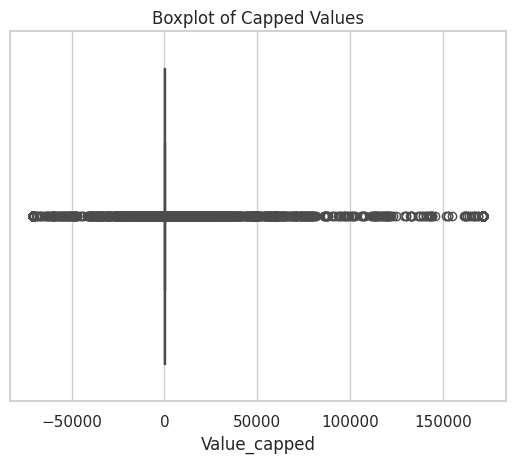

In [132]:
#visualize
sns.boxplot(data=df_long, x='Value_capped')
plt.title('Boxplot of Capped Values')
plt.show()

Clean YEAR column

In [133]:
year_cols = [col for col in df.columns if "YR" in col or col.isdigit()]
print("Original year columns:", year_cols)
year_cols = df.columns[4:14]
year_cols_clean = {col: int(col.split("[")[0].strip()) for col in year_cols if "YR" in col}
print("Cleaned year columns:", year_cols_clean)
df.rename(columns=year_cols_clean, inplace=True)
print("Renamed columns:", df.columns) #extract again YEAR column


Original year columns: ['2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]', '2023 [YR2023]']
Cleaned year columns: {'2014 [YR2014]': 2014, '2015 [YR2015]': 2015, '2016 [YR2016]': 2016, '2017 [YR2017]': 2017, '2018 [YR2018]': 2018, '2019 [YR2019]': 2019, '2020 [YR2020]': 2020, '2021 [YR2021]': 2021, '2022 [YR2022]': 2022, '2023 [YR2023]': 2023}
Renamed columns: Index(['Country Name', 'Country Code', 'Series Name', 'Series Code', 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype='object')


In [134]:
print(df.columns.tolist())

['Country Name', 'Country Code', 'Series Name', 'Series Code', 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


Calculate Moving Average

In [135]:
year_cols = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
df[year_cols] = df[year_cols].apply(pd.to_numeric, errors='coerce')
# Calculate 10-year moving average across time per row, for time series data to interpret
N = 10
df['Moving_Avg'] = df[year_cols].apply(lambda row: row.dropna().tail(N).mean(), axis=1)
print(df[['Country Name', 'Series Code'] + year_cols + ['Moving_Avg']].head())

  Country Name  Series Code       2014       2015       2016       2017       2018       2019       2020       2021  2022  2023  Moving_Avg
0  Afghanistan            5  25.700000  27.250000  28.500000  30.000000  31.100000  32.450000  33.800000  35.400000   NaN   NaN   30.525000
1  Afghanistan            7  89.500000  71.500000  97.700000  97.700000  93.430878  97.700000  97.700000  97.700000   NaN   NaN   92.866360
2  Afghanistan           39   0.315571   0.290261   0.363282   0.350879   0.401053   0.370131   0.243668   0.335935   NaN   NaN    0.333848
3  Afghanistan           38   0.216609   0.232762   0.284781   0.229822   0.237615   0.269353   0.237958   0.317732   NaN   NaN    0.253329
4  Afghanistan            0  58.123668  58.123668  58.123668  58.123668  58.276988  58.276988  58.741548  58.741548   NaN   NaN   58.316468


In [136]:
df_long["Year"] = df_long["Year"].dt.year
df_long["Year"] = pd.to_datetime(df_long['Year'], format='%Y')
print(df_long["Year"])
print("")
print(df_long.dtypes)

0        2014-01-01
1        2014-01-01
2        2014-01-01
3        2014-01-01
4        2014-01-01
            ...    
145405   2023-01-01
145463   2023-01-01
145476   2023-01-01
145534   2023-01-01
145547   2023-01-01
Name: Year, Length: 83265, dtype: datetime64[ns]

Country Code             int64
Series Code              int64
Year            datetime64[ns]
Value                  float64
Value_capped           float64
dtype: object


In [137]:
# Create a copy to store standardized values
df_zscore = df.copy()
year_cols = [col for col in df.columns if isinstance(col, int)]
scaler = StandardScaler()
grouped = df.groupby('Series Code')

for name, group in grouped:
    idx = group.index  # Save the index so we can assign back
    if all(col in group.columns for col in year_cols):
        scaled_values = scaler.fit_transform(group[year_cols])
        df_zscore.loc[idx, year_cols] = scaled_values
    else:
        print(f"Warning: Missing year columns for Series Code: {name}")
print("\n✅ Z-score standardization complete. Preview:")
print(df_zscore[year_cols].head())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning:

invalid value encountered in divide




✅ Z-score standardization complete. Preview:
       2014      2015      2016      2017      2018      2019      2020      2021  2022  2023
0 -1.003264 -0.979791 -0.964382 -0.942207 -0.930146 -0.911135 -0.891424 -0.864421   NaN   NaN
1  0.322179 -0.344467  0.578612  0.560523  0.384235  0.533280  0.517510  0.505147   NaN   NaN
2 -0.645011 -0.564700 -0.565755 -0.591155 -0.557036 -0.556618 -0.577251 -0.582162   NaN   NaN
3 -0.323711 -0.328013 -0.319030 -0.332789 -0.300685 -0.280804 -0.311399 -0.275110   NaN   NaN
4  0.941332  0.934994  0.931739  0.928260  0.935848  0.936644  0.958338  0.955644   NaN   NaN


/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning:

invalid value encountered in divide



In [138]:
example_series = df['Series Code'].unique()[0]
subset = df_zscore[df_zscore['Series Code'] == example_series]

print("Means:\n", subset[year_cols].mean())
print("Stds:\n", subset[year_cols].std())

Means:
 2014    1.767519e-17
2015    9.279476e-17
2016   -1.524485e-16
2017    1.745425e-16
2018    1.789613e-16
2019    2.231493e-16
2020    2.430339e-16
2021    1.546579e-16
2022             NaN
2023             NaN
dtype: float64
Stds:
 2014    1.002497
2015    1.002497
2016    1.002497
2017    1.002497
2018    1.002497
2019    1.002497
2020    1.002497
2021    1.002497
2022         NaN
2023         NaN
dtype: float64


Reshape data for modeling

In [139]:
df_long["Year"] = pd.to_numeric(df_long["Year"], errors='coerce').astype('Int64')

In [140]:
#convert esg data to numeric
df_long["Value"] = pd.to_numeric(df_long["Value"], errors='coerce')
# Check how many missing values still exist
missing_count = df_long["Value"].isna().sum()
total_count = df_long.shape[0]
missing_count, total_count, f"{(missing_count / total_count) * 100:.2f}% missing"

(np.int64(0), 83265, '0.00% missing')

In [141]:
id_vars_list = ['Country Name', 'Country Code', 'Series Code','Series Name']
year_cols = [col for col in df.columns if isinstance(col, int)]
df_long = df.melt(id_vars=id_vars_list,
                  value_vars=year_cols, # Use the list of integer year column names
                  var_name="Year",
                  value_name='Value')
print(df_long.head())


  Country Name  Country Code  Series Code                                        Series Name  Year      Value
0  Afghanistan             0            5  Access to clean fuels and technologies for coo...  2014  25.700000
1  Afghanistan             0            7            Access to electricity (% of population)  2014  89.500000
2  Afghanistan             0           39  Adjusted savings: natural resources depletion ...  2014   0.315571
3  Afghanistan             0           38  Adjusted savings: net forest depletion (% of GNI)  2014   0.216609
4  Afghanistan             0            0                 Agricultural land (% of land area)  2014  58.123668


In [142]:
df_pivoted = df_long.pivot_table(
    index=["Country Name", "Country Code", "Year"],
    columns="Series Name",
    values="Value"
).reset_index()

EDA (Basic Data Overview)

GDP as dependent variable

In [143]:
df_gdp = df[df["Series Code"] == 40].copy()
df_gdp.columns = df_gdp.columns.astype(str).str.strip()
year_cols = [col for col in df_gdp.columns if str(col).isdigit()]
df_gdp_long = df_gdp.melt(
    id_vars=["Country Name", "Country Code", "Series Code"],
    value_vars=year_cols,
    var_name="Year",
    value_name="GDP Growth"
) #melt into long format

df_gdp_long["Year"] = df_gdp_long["Year"].astype(int)  # Convert Year to int
print(df_gdp_long.head())

  Country Name  Country Code  Series Code  Year  GDP Growth
0  Afghanistan             0           40  2014    2.724543
1      Albania             2           40  2014    1.774449
2      Algeria            49           40  2014    3.800000
3      Andorra             3           40  2014    2.504466
4       Angola             1           40  2014    4.822559


Merge dependent variable

In [144]:
df_merged = pd.merge(
    df_pivoted,
    df_gdp_long[['Country Name', 'Year', 'GDP Growth']], # Select necessary columns from df_gdp_long
    on=["Country Name", "Year"],
    how="inner"
)
print(df_merged.head())

  Country Name  Country Code  Year  Access to clean fuels and technologies for cooking (% of population)  Access to electricity (% of population)  Adjusted savings: natural resources depletion (% of GNI)  Adjusted savings: net forest depletion (% of GNI)  Agricultural land (% of land area)  Agriculture, forestry, and fishing, value added (% of GDP)  Annual freshwater withdrawals, total (% of internal resources)  Annualized average growth rate in per capita real survey mean consumption or income, total population (%)  CO2 emissions (metric tons per capita)  Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)  Children in employment, total (% of children ages 7-14)  Coastal protection  Control of Corruption: Estimate  Cooling Degree Days  Economic and Social Rights Performance Score  Electricity production from coal sources (% of total)  Energy imports, net (% of energy use)  Energy intensity level of primary energy (MJ/$2017 PPP GDP)  En

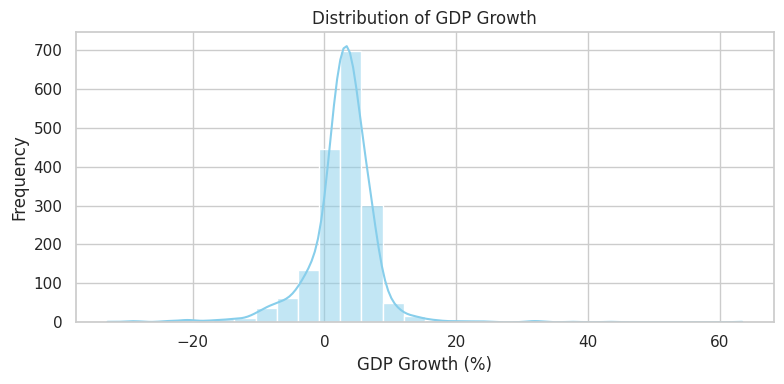

In [145]:
plt.figure(figsize=(8, 4))
sns.histplot(df_merged['GDP Growth'], kde=True, color='skyblue', bins=30)
plt.title("Distribution of GDP Growth")
plt.xlabel("GDP Growth (%)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [146]:
# Define the list of ESG columns
esg_columns = [col for col in df_pivoted.columns if col not in ["Country Name", "Country Code", "Series Name", "Series Code","Year"]]

df_merged[esg_columns] = df_merged.groupby('Country Name')[esg_columns].transform(lambda x: x.ffill().bfill())

In [147]:
print(esg_columns)

['Access to clean fuels and technologies for cooking (% of population)', 'Access to electricity (% of population)', 'Adjusted savings: natural resources depletion (% of GNI)', 'Adjusted savings: net forest depletion (% of GNI)', 'Agricultural land (% of land area)', 'Agriculture, forestry, and fishing, value added (% of GDP)', 'Annual freshwater withdrawals, total (% of internal resources)', 'Annualized average growth rate in per capita real survey mean consumption or income, total population (%)', 'CO2 emissions (metric tons per capita)', 'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)', 'Children in employment, total (% of children ages 7-14)', 'Coastal protection', 'Control of Corruption: Estimate', 'Cooling Degree Days', 'Economic and Social Rights Performance Score', 'Electricity production from coal sources (% of total)', 'Energy imports, net (% of energy use)', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', '

Top 15 Correlation GDP Growth and ESG Indicators

/tmp/ipython-input-148-2495341022.py:5: UserWarning:

Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.



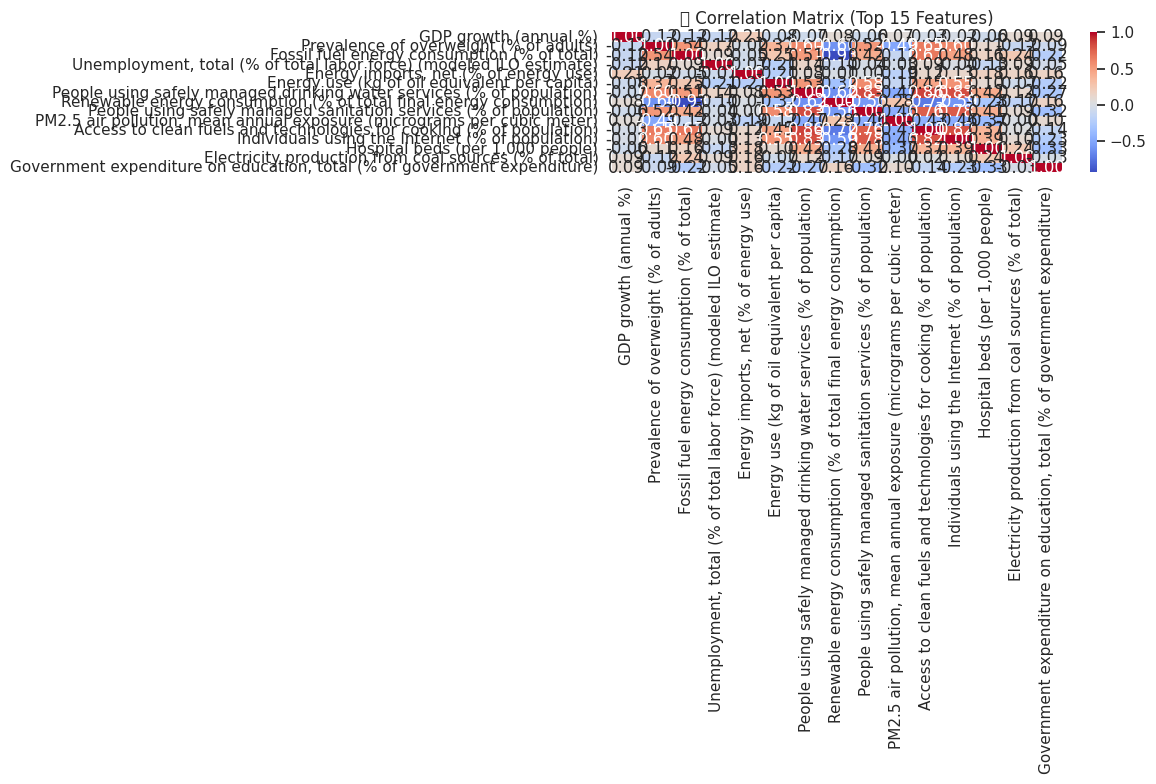

In [148]:
top_corr = df_merged[esg_columns].corrwith(df_merged['GDP Growth']).abs().sort_values(ascending=False).head(15).index
plt.figure(figsize=(12, 8))
sns.heatmap(df_merged[top_corr].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("🔗 Correlation Matrix (Top 15 Features)")
plt.tight_layout()
plt.show()

Detect outliers

In [149]:
def detect_outliers_iqr(df, columns):
    outlier_indices = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = detect_outliers_iqr(df_merged, esg_columns)
        outlier_indices[col] = df[col][outliers].index.tolist()

    return outlier_indices

In [150]:
#confirm again whether esg data is numeric before correlation analysis
print(df_merged.dtypes)

Country Name                                                             object
Country Code                                                              int64
Year                                                                      int64
Access to clean fuels and technologies for cooking (% of population)    float64
Access to electricity (% of population)                                 float64
                                                                         ...   
Tree Cover Loss (hectares)                                              float64
Unemployment, total (% of total labor force) (modeled ILO estimate)     float64
Unmet need for contraception (% of married women ages 15-49)            float64
Voice and Accountability: Estimate                                      float64
GDP Growth                                                              float64
Length: 74, dtype: object


In [151]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define target and columns to exclude
target_col = 'GDP Growth'
exclude_cols = [target_col, 'GDP growth (annual %)', 'Country Code', 'Year']
numeric_cols = [col for col in df_merged.select_dtypes(include='number').columns if col not in exclude_cols]
baseline_data = df_merged[numeric_cols + [target_col]].dropna()

X_base = baseline_data[numeric_cols]
y_base = baseline_data[target_col]
X_train, X_test, y_train, y_test = train_test_split(X_base, y_base, test_size=0.3, random_state=0)
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)
y_pred = baseline_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n🔹 Baseline Linear Regression Model (All Features)")
print(f"→ MSE: {mse:.4f}")
print(f"→ RMSE: {rmse:.4f}")
print(f"→ R² Score: {r2:.4f}")


🔹 Baseline Linear Regression Model (All Features)
→ MSE: 392.3230
→ RMSE: 19.8071
→ R² Score: -45.5209


In [152]:
# Calculate correlations with GDP growth
correlations = df_merged[numeric_cols + [target_col]].corr()[target_col].drop(target_col)
print("Correlations with GDP growth:\n", correlations.sort_values(ascending=False))

# Select top 10 positive and negative correlated features
top_positive = correlations.sort_values(ascending=False).head(10)
top_negative = correlations.sort_values().head(10)
combined = pd.concat([top_positive, top_negative])
# Calculate VIF for features
X = df_merged[numeric_cols].dropna()
X_vif = sm.add_constant(X)

vif_df = pd.DataFrame({
    "Feature": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
}).sort_values("VIF", ascending=False)

print("VIF values:\n", vif_df)

# Identify perfectly collinear features (VIF = inf)
inf_feats = vif_df[vif_df['VIF'] == float('inf')]['Feature'].tolist()
print("Perfectly collinear features:", inf_feats)

Correlations with GDP growth:
 Energy imports, net (% of energy use)                                       0.117513
Renewable energy consumption (% of total final energy consumption)          0.086798
PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)      0.075944
Electricity production from coal sources (% of total)                       0.069467
Government expenditure on education, total (% of government expenditure)    0.069246
                                                                              ...   
People using safely managed drinking water services (% of population)      -0.088418
Energy use (kg of oil equivalent per capita)                               -0.099998
Unemployment, total (% of total labor force) (modeled ILO estimate)        -0.117822
Fossil fuel energy consumption (% of total)                                -0.119958
Prevalence of overweight (% of adults)                                     -0.130422
Name: GDP Growth, Length: 69, dtyp

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning:

divide by zero encountered in scalar divide

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide



Apply PCA

In [153]:
#apply PCA to handle highly correlated features
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(df_merged[numeric_cols])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
pca = PCA(n_components=1)
pca_result = pca.fit_transform(X_scaled)
df_merged['pca_feature'] = pca_result

In [154]:
#recalculate VIF after combining
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

X = df_merged[numeric_cols].dropna()
X_vif = sm.add_constant(X)

vif_df = pd.DataFrame({
    "Feature": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
}).sort_values("VIF", ascending=False)

print(vif_df)

                                              Feature           VIF
1   Access to clean fuels and technologies for coo...           inf
2             Access to electricity (% of population)           inf
4   Adjusted savings: net forest depletion (% of GNI)           inf
3   Adjusted savings: natural resources depletion ...           inf
5                  Agricultural land (% of land area)           inf
..                                                ...           ...
65  Terrestrial and marine protected areas (% of t...           inf
68  Unmet need for contraception (% of married wom...           inf
54  Ratio of female to male labor force participat...  3.584017e+05
67  Unemployment, total (% of total labor force) (...  2.871864e+05
0                                               const  0.000000e+00

[70 rows x 2 columns]


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning:

divide by zero encountered in scalar divide

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide



In [155]:
!pip install catboost

In [156]:
df_clean = df_merged.dropna(subset=['GDP Growth'])
X_clean = df_clean[['pca_feature']]  # Replace with actual PCA features
y_clean = df_clean['GDP Growth']

In [157]:
print("📊 Dataset shape:", df_clean.shape)
print("🔍 Missing values:\n", df_clean.isnull().sum().sort_values(ascending=False).head())
print("💡 Data types:\n", df_clean.dtypes.value_counts())

📊 Dataset shape: (1792, 75)
🔍 Missing values:
 Children in employment, total (% of children ages 7-14)                                                      1567
Proportion of bodies of water with good ambient water quality                                                1008
Unmet need for contraception (% of married women ages 15-49)                                                  813
Coastal protection                                                                                            798
Annualized average growth rate in per capita real survey mean consumption or income, total population (%)     777
dtype: int64
💡 Data types:
 float64    72
int64       2
object      1
Name: count, dtype: int64


In [158]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.3, random_state=42)
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(iterations=100, depth=3, learning_rate=0.1, loss_function='RMSE', verbose=0)
}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")


Linear Regression - MSE: 28.3911, RMSE: 5.3283, R²: -0.0020
Random Forest - MSE: 42.0176, RMSE: 6.4821, R²: -0.4829
XGBoost - MSE: 32.9744, RMSE: 5.7423, R²: -0.1637
CatBoost - MSE: 28.2443, RMSE: 5.3145, R²: 0.0032


R2 show negative, meaning that PCA features may not be strongly predictive to GDP Growth

In [159]:
# Clean rows with missing values in features or target
df_clean = df_merged.dropna(subset=numeric_cols + ['GDP Growth'])

# Create aligned X and y
X_clean = df_clean[numeric_cols]
y_clean = df_clean['GDP Growth']

print(X_clean.shape, y_clean.shape)
print(X_clean.index.equals(y_clean.index))

(18, 69) (18,)
True


Mutual Info

In [160]:
#Feature Selection for LR
from sklearn.feature_selection import mutual_info_regression

#Mutual Info
mi = mutual_info_regression(X_clean, y_clean, random_state=0)
mi_series = pd.Series(mi, index=X_clean.columns).sort_values(ascending=False)
print(mi_series.head(10))
X_sel = X_clean[mi_series[mi_series > 0.01].index] #select strong features

X_train, X_test, y_train, y_test = train_test_split(
    X_sel, y_clean, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression — RMSE: {rmse:.4f}, R²: {r2:.4f}")

Unemployment, total (% of total labor force) (modeled ILO estimate)     0.211105
CO2 emissions (metric tons per capita)                                  0.162907
Agriculture, forestry, and fishing, value added (% of GDP)              0.149919
Hospital beds (per 1,000 people)                                        0.147957
Rule of Law: Estimate                                                   0.119298
Access to clean fuels and technologies for cooking (% of population)    0.116662
Mortality rate, under-5 (per 1,000 live births)                         0.114011
Access to electricity (% of population)                                 0.102398
Political Stability and Absence of Violence/Terrorism: Estimate         0.095665
Nitrous oxide emissions (metric tons of CO2 equivalent per capita)      0.088166
dtype: float64
Linear Regression — RMSE: 44.3252, R²: -3422.3678


In [161]:
X.columns = X.columns.str.strip()

RFE + RF

In [162]:
#Feature Selection: Recursive Feature Elimination + RF
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Initialize RFE with linear model (for ranking)
selector = RFE(estimator=LinearRegression(), n_features_to_select=10)
selector = selector.fit(X_clean, y_clean)
rfe_features = X_clean.columns[selector.support_]
common_feats = [f for f in rfe_features if f in X_clean.columns]
X_rfe = X_clean[common_feats]

X_train, X_test, y_train, y_test = train_test_split(X_rfe, y_clean, test_size=0.2, random_state=42)
rf = RandomForestRegressor(random_state=42).fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("RF R²:", r2_score(y_test, y_pred))
print("RF RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

rf_imp = pd.Series(rf.feature_importances_, index=common_feats).sort_values(ascending=False)
print("RF feature importances:\n", rf_imp.head(10))


RF R²: 0.26189031955948383
RF RMSE: 0.6508549023549316
RF feature importances:
 Poverty headcount ratio at national poverty lines (% of population)    0.447839
Gini index                                                             0.141350
Income share held by lowest 20%                                        0.139001
Unemployment, total (% of total labor force) (modeled ILO estimate)    0.081388
Adjusted savings: natural resources depletion (% of GNI)               0.059201
Standardised Precipitation-Evapotranspiration Index                    0.031187
Heat Index 35                                                          0.029576
Agricultural land (% of land area)                                     0.025694
Proportion of bodies of water with good ambient water quality          0.024512
Land Surface Temperature                                               0.020253
dtype: float64


XGB & CB Feature Importance

In [163]:
import xgboost as xgb
from catboost import CatBoostRegressor
X = X_clean
y = y_clean
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#XGB
xgb_model = xgb.XGBRegressor(max_depth=6, learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost - RMSE: {rmse_xgb:.4f}, R²: {r2_xgb:.4f}")
xgb_importance = pd.Series(xgb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("XGBoost Feature Importance:")
print(xgb_importance.head(10))

#CatBoost
cb_model = CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1, random_state=42, verbose=False)
cb_model.fit(X_train, y_train)
y_pred_cb = cb_model.predict(X_test)
rmse_cb = np.sqrt(mean_squared_error(y_test, y_pred_cb))
r2_cb = r2_score(y_test, y_pred_cb)
print(f"CatBoost - RMSE: {rmse_cb:.4f}, R²: {r2_cb:.4f}")
cb_importance = pd.Series(cb_model.get_feature_importance(type='PredictionValuesChange'), index=X_train.columns).sort_values(ascending=False)
print("CatBoost Feature Importance:")
print(cb_importance.head(10))

XGBoost - RMSE: 2.1963, R²: -7.4051
XGBoost Feature Importance:
Poverty headcount ratio at national poverty lines (% of population)     0.629532
Gini index                                                              0.164751
CO2 emissions (metric tons per capita)                                  0.129170
Cooling Degree Days                                                     0.027530
Agriculture, forestry, and fishing, value added (% of GDP)              0.023053
Patent applications, residents                                          0.008677
Access to clean fuels and technologies for cooking (% of population)    0.007750
Unemployment, total (% of total labor force) (modeled ILO estimate)     0.006372
Land Surface Temperature                                                0.002773
Coastal protection                                                      0.000251
dtype: float32
CatBoost - RMSE: 0.9235, R²: -0.4861
CatBoost Feature Importance:
Poverty headcount ratio at national poverty l

Group ESG Indicators

In [164]:
#Try with Analyse by ESG Pillars
#Group ESG indicators
esg_dict = {
    "E":["Access to clean fuels and technologies for cooking (% of population)", "Access to electricty (% of population)", "Adjusted savings: natural resources depletion (% of GNI)", "Adjusted savings: net forest depletion (% of GNI)", "Agricultural land (% of land area)", "Agriculture, forestry, and fishing, value added (% of GDP)", "Annual freshwater withdrawals, total (% of internal resources)", "CO2 emissions (metric tons per capita)", "Coastal protection", "Cooling Degree Days", "Electricity production from coal sources (% of total)", "Energy imports, net (% of energy use)", "Energy intensity level of primary energy (MJ/$2017 PPP GDP)", "Energy use (kg of oil equivalent per capita)", "Forest area (% of land area)", "Fossil fuel energy consumption (% of total)", "GHG net emissions/removals by LUCF (Mt of CO2 equivalent)", "Heat Index 35", "Heating Degree Days", "Land Surface Temperature", "Level of water stress: freshwater withdrawal as a proportion of available freshwater resources", "Methane emissions (metric tons of CO2 equivalent per capita)", "Nitrous oxide emissions (metric tons of CO2 equivalent per capita)", "People using safely managed sanitation services (% of population)", "PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)", "Proportion of bodies of water with good ambient water quality", "Renewable electricity output (% of total electricity output)", "Renewable energy consumption (% of total final energy consumption)", "Scientiic and technical journal articles", "Standardised Precipitation-Evapotranspiration Index", "Tree Cover Loss (hectares)", "Unmet need for contraception (% of married women ages 15-29)"],
    "S":["Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)", "Children in employment, total (% of children ages 7-14)", "Economic and Social Rights Performance Score", "Fertility rate, total (births per woman)", "Food production index (2014-2016 = 100)", "Gini index", "Government expenditure on education, total (% of government expenditure)", "Hospital beds (per 1,000 people)", "Income share held by lowest 20%", "Individuals using the Internet (% of population)", "Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)", "Life expectancy at birth, total (years)", "Literacy rate, adult total (% of people ages 15 and above)", "Mortality rate, under-5 (per 1,000 live births)", "Net migration", "Patent applications, residents", "Political Stability and Absence of Violence/Terrorism: Estimate", "Population ages 65 and above (% of total population)", "Population density (people per sq. km of land area)", "Poverty headcount ratio at national poverty lines (% of population)", "Prevalence of overweight (% of adults)", "Prevalence of undernourishment (% of population)", "Proportion of seats held by women in national parliaments (%)", "Ratio of female to male labor force participation rate (%)", "School enrollment, primary (% gross)", "School enrollment, primary and secondary (gross), gender parity index (GPI)", "Unemployment, total (% of total labor force)"],
    "G":["Control of Corruption: Estimate", "Government Effectiveness: Estimate", "Regulatory Quality: Estimate", "Rule of Law: Estimate", "Strength of legal rights index (0=weak to 12=strong)", "Voice and Accountability: Estimate"]
}

df_e_cols = [col for col in esg_dict["E"] if col in df_merged.columns]
df_s_cols = [col for col in esg_dict["S"] if col in df_merged.columns]
df_g_cols = [col for col in esg_dict["G"] if col in df_merged.columns]

df_e = df_merged[df_e_cols]
df_s = df_merged[df_s_cols]
df_g = df_merged[df_g_cols]

print(df_e.head())

   Access to clean fuels and technologies for cooking (% of population)  Adjusted savings: natural resources depletion (% of GNI)  Adjusted savings: net forest depletion (% of GNI)  Agricultural land (% of land area)  Agriculture, forestry, and fishing, value added (% of GDP)  Annual freshwater withdrawals, total (% of internal resources)  CO2 emissions (metric tons per capita)  Coastal protection  Cooling Degree Days  Electricity production from coal sources (% of total)  Energy imports, net (% of energy use)  Energy intensity level of primary energy (MJ/$2017 PPP GDP)  Energy use (kg of oil equivalent per capita)  Forest area (% of land area)  Fossil fuel energy consumption (% of total)  Heat Index 35  Heating Degree Days  Land Surface Temperature  Level of water stress: freshwater withdrawal as a proportion of available freshwater resources  Methane emissions (metric tons of CO2 equivalent per capita)  Nitrous oxide emissions (metric tons of CO2 equivalent per capita)  People using 

Check For Skewness

       Access to clean fuels and technologies for cooking (% of population)  Adjusted savings: natural resources depletion (% of GNI)  Adjusted savings: net forest depletion (% of GNI)  Agricultural land (% of land area)  Agriculture, forestry, and fishing, value added (% of GDP)  Annual freshwater withdrawals, total (% of internal resources)  CO2 emissions (metric tons per capita)  Coastal protection  Cooling Degree Days  Electricity production from coal sources (% of total)  Energy imports, net (% of energy use)  Energy intensity level of primary energy (MJ/$2017 PPP GDP)  Energy use (kg of oil equivalent per capita)  Forest area (% of land area)  Fossil fuel energy consumption (% of total)  Heat Index 35  Heating Degree Days  Land Surface Temperature  Level of water stress: freshwater withdrawal as a proportion of available freshwater resources  Methane emissions (metric tons of CO2 equivalent per capita)  Nitrous oxide emissions (metric tons of CO2 equivalent per capita)  People us

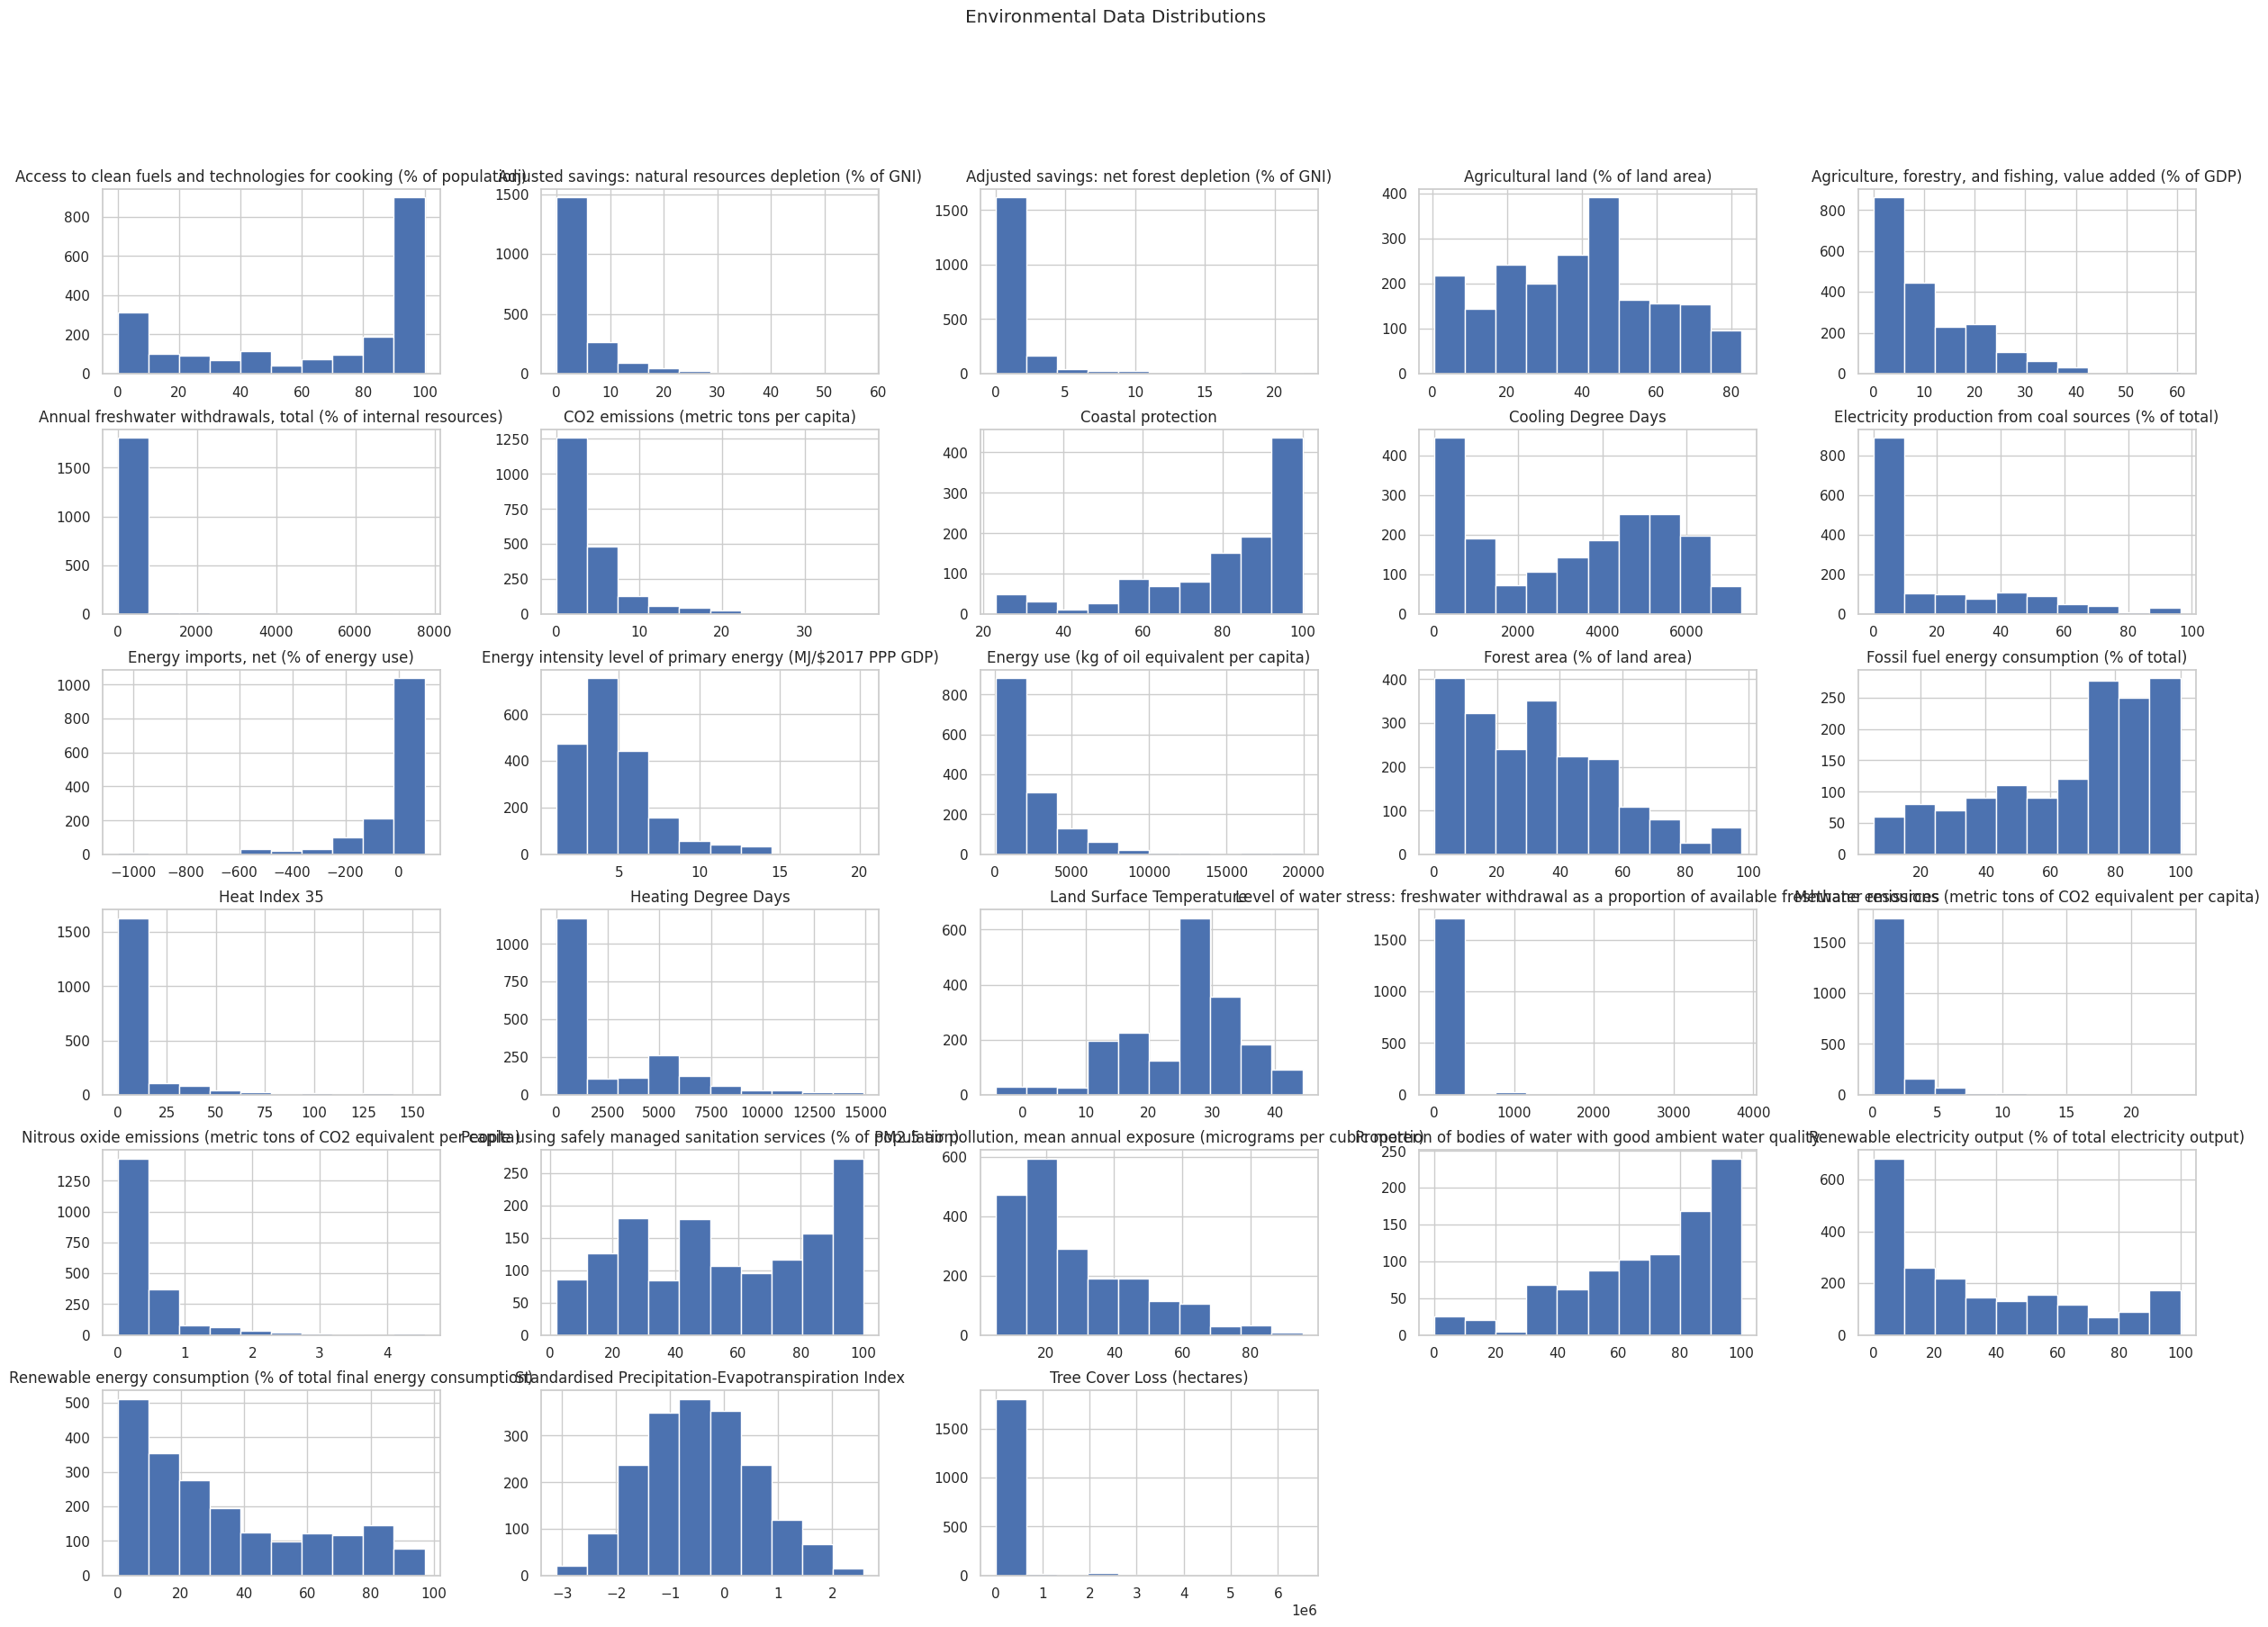

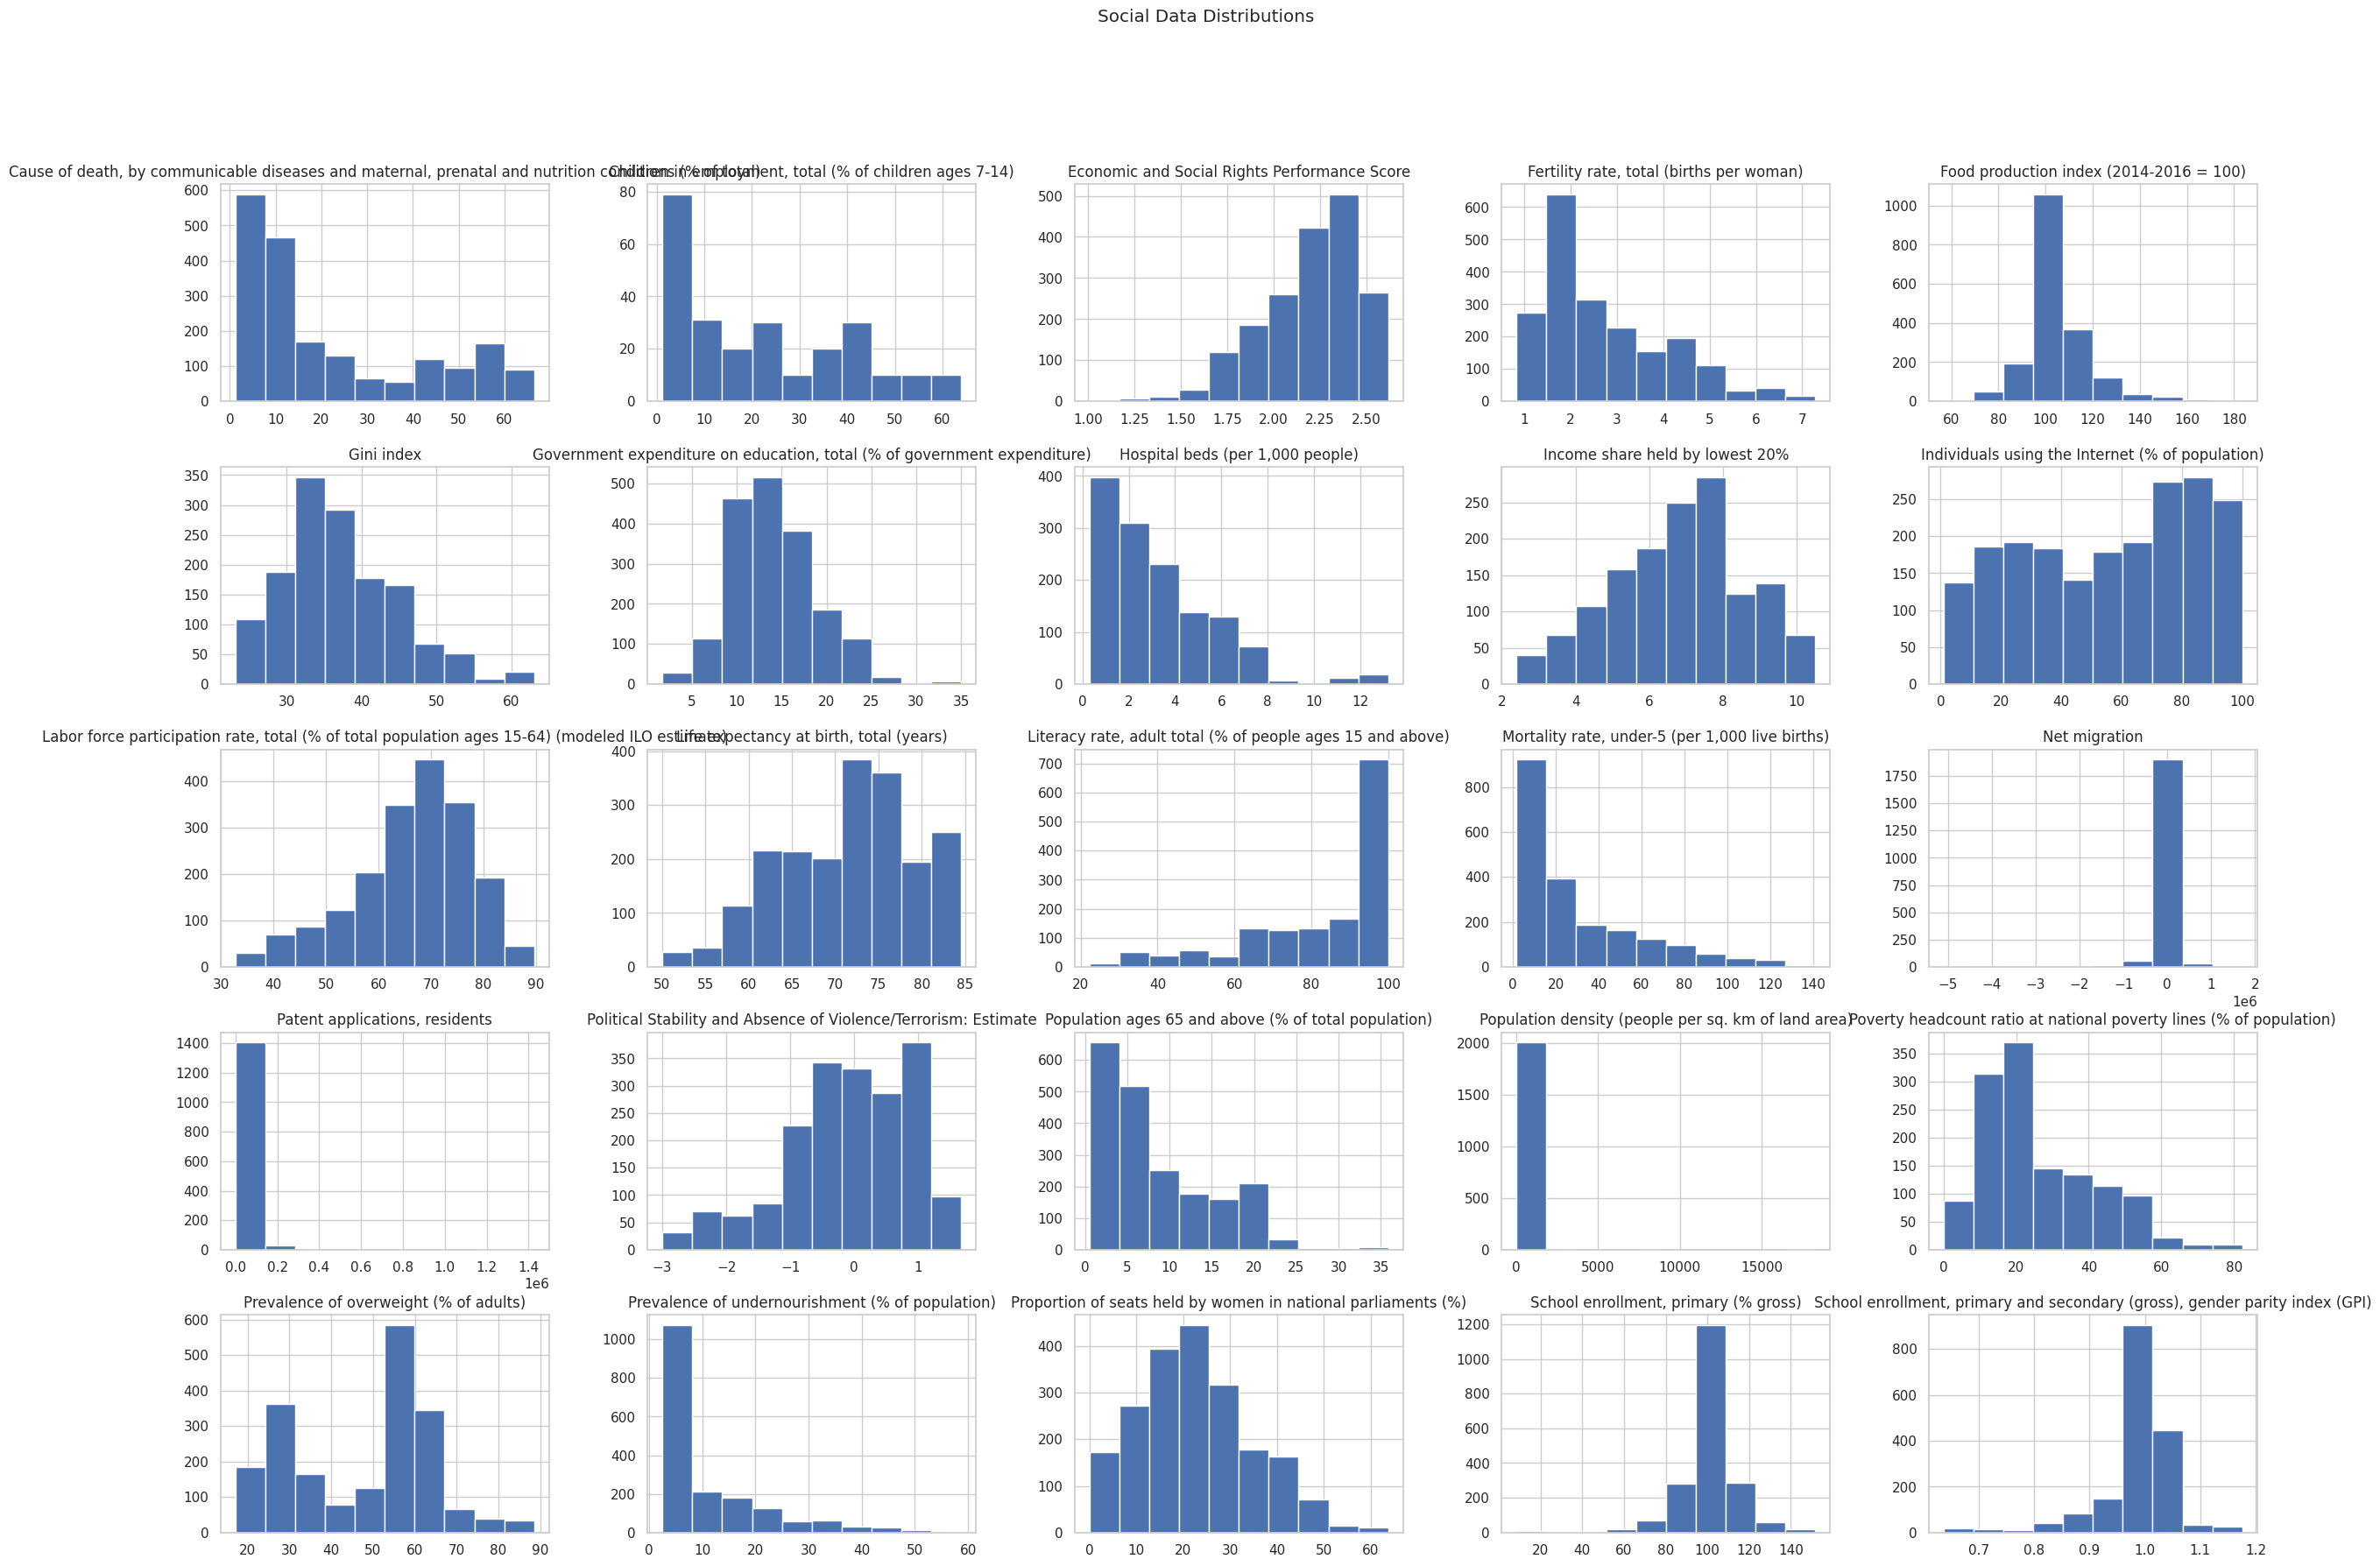

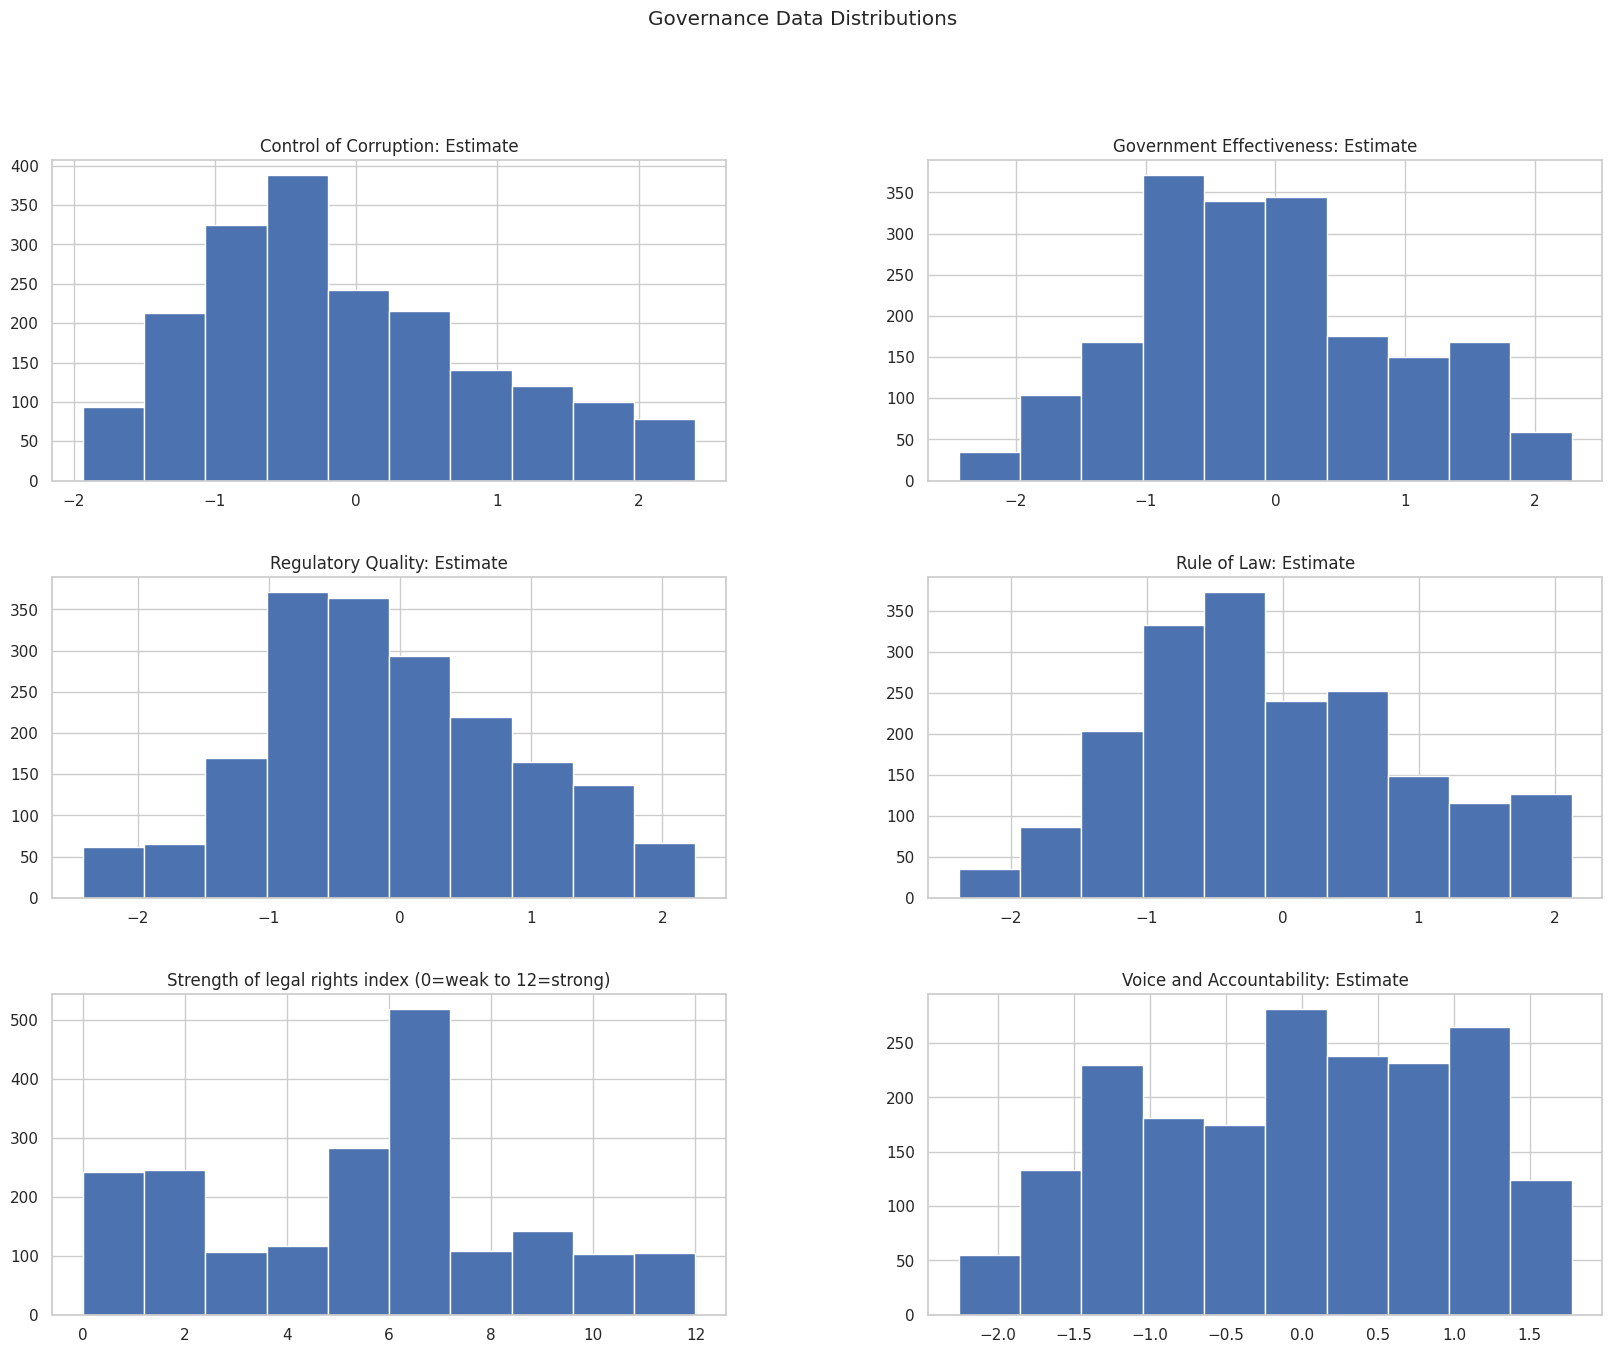

In [165]:
#descriptive statistics
print(df_e.describe())
print(df_s.describe())
print(df_g.describe())

df_e.hist(bins=10, figsize=(30, 20))
plt.suptitle("Environmental Data Distributions")
plt.show()
df_s.hist(bins=10, figsize=(30, 20))
plt.suptitle("Social Data Distributions")
plt.show()
df_g.hist(bins=10, figsize=(20, 15))
plt.suptitle("Governance Data Distributions")
plt.show()

Modeling

In [166]:
df_e = df_e.copy()
df_s = df_s.copy()
df_g = df_g.copy()

df_e['GDP Growth'] = df_merged['GDP Growth']
df_s['GDP Growth'] = df_merged['GDP Growth']
df_g['GDP Growth'] = df_merged['GDP Growth']

def model_by_pillar(df_group, name, k_features=5):
    df_group = df_group.ffill().bfill()
    X = df_group.drop(columns=['GDP Growth'])
    y = df_group['GDP Growth']
    selected_feature_file = f"selected_features_{name}.txt" #save selected features
    if os.path.exists(selected_feature_file):
        with open(selected_feature_file, "r") as f:
            selected_columns = f.read().splitlines()
    else:
        # Run feature selection
        model = RandomForestRegressor(random_state=42)
        model.fit(X, y)

        importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
        selected_columns = importances.head(k_features).index.tolist()

        with open(selected_feature_file, "w") as f:
            f.write("\n".join(selected_columns))
    X = X[selected_columns]
    mask = ~y.isna()
    X, y = X.loc[mask], y.loc[mask]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Linear Regression
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)
    r2_lr = r2_score(y_test, y_pred_lr)
    rmse_lr = mean_squared_error(y_test, y_pred_lr)

    # Random Forest
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    r2_rf = r2_score(y_test, y_pred_rf)
    rmse_rf = mean_squared_error(y_test, y_pred_rf)

    # XGBoost
    xgb_model = xgb.XGBRegressor(max_depth=6, learning_rate=0.1, n_estimators=100, random_state=42)
    xgb_model.fit(X_train, y_train)
    y_pred_xgb = xgb_model.predict(X_test)
    r2_xgb = r2_score(y_test, y_pred_xgb)
    rmse_xgb = mean_squared_error(y_test, y_pred_xgb)

    # CatBoost
    cb_model = CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1, random_state=42, verbose=False)
    cb_model.fit(X_train, y_train)
    y_pred_cb = cb_model.predict(X_test)
    r2_cb = r2_score(y_test, y_pred_cb)
    rmse_cb = mean_squared_error(y_test, y_pred_cb)

    print(f"\n📊 {name} Model Performance:")
    print(f"🧮 Linear Regression → R²: {r2_lr:.4f}, RMSE: {rmse_lr:.4f}")
    print(f"🌲 Random Forest     → R²: {r2_rf:.4f}, RMSE: {rmse_rf:.4f}")
    print(f"📈 XGBoost           → R²: {r2_xgb:.4f}, RMSE: {rmse_xgb:.4f}")
    print(f"🌿 CatBoost          → R²: {r2_cb:.4f}, RMSE: {rmse_cb:.4f}")
    return (r2_lr, rmse_lr), (r2_rf, rmse_rf), (r2_xgb, rmse_xgb), (r2_cb, rmse_cb)

Model Evaluation

In [167]:
import os
lr_perf, rf_perf, xgb_perf, cb_perf = model_by_pillar(df_e, "Environmental Pillar")
lr_perf, rf_perf, xgb_perf, cb_perf = model_by_pillar(df_s, "Social Pillar")
lr_perf, rf_perf, xgb_perf, cb_perf = model_by_pillar(df_g, "Governance Pillar")



📊 Environmental Pillar Model Performance:
🧮 Linear Regression → R²: 0.0070, RMSE: 24.1346
🌲 Random Forest     → R²: 0.0812, RMSE: 22.3318
📈 XGBoost           → R²: -0.0790, RMSE: 26.2236
🌿 CatBoost          → R²: 0.0592, RMSE: 22.8644

📊 Social Pillar Model Performance:
🧮 Linear Regression → R²: -0.0318, RMSE: 25.0770
🌲 Random Forest     → R²: 0.1362, RMSE: 20.9933
📈 XGBoost           → R²: -0.0400, RMSE: 25.2768
🌿 CatBoost          → R²: 0.0498, RMSE: 23.0929

📊 Governance Pillar Model Performance:
🧮 Linear Regression → R²: -0.0002, RMSE: 24.3085
🌲 Random Forest     → R²: 0.0224, RMSE: 23.7607
📈 XGBoost           → R²: -0.0304, RMSE: 25.0441
🌿 CatBoost          → R²: 0.0455, RMSE: 23.1971


Create Lag Model (2-year & 5-year)

In [168]:
df_merged['GDP_Growth_Plus_2'] = df_merged.groupby('Country Code')['GDP Growth'].shift(-2)
df_merged['GDP_Growth_Plus_5'] = df_merged.groupby('Country Code')['GDP Growth'].shift(-5)
df_e = df_e.copy()
df_s = df_s.copy()
df_g = df_g.copy()

def run_lagged_model(df_pillar, target_column, label):
    df = df_pillar.copy()
    if target_column not in df_merged.columns:
        raise ValueError(f"❌ Column {target_column} not found in df_merged.")
    df['GDP Growth'] = df_merged[target_column]
    return model_by_pillar(df, f"{label} (Target: {target_column})")

# 2-year ahead models
lr_e_2, rf_e_2, xgb_e_2, cb_e_2 = run_lagged_model(df_e, 'GDP_Growth_Plus_2', "Environmental")
lr_s_2, rf_s_2, xgb_s_2, cb_s_2 = run_lagged_model(df_s, 'GDP_Growth_Plus_2', "Social")
lr_g_2, rf_g_2, xgb_g_2, cb_g_2 = run_lagged_model(df_g, 'GDP_Growth_Plus_2', "Governance")

# 5-year ahead models
lr_e_5, rf_e_5, xgb_e_5, cb_e_5 = run_lagged_model(df_e, 'GDP_Growth_Plus_5', "Environmental")
lr_s_5, rf_s_5, xgb_s_5, cb_s_5 = run_lagged_model(df_s, 'GDP_Growth_Plus_5', "Social")
lr_g_5, rf_g_5, xgb_g_5, cb_g_5 = run_lagged_model(df_g, 'GDP_Growth_Plus_5', "Governance")
print("\n📊 Lagged Model Summary (R²):")
print(f"Env - 2yr: LR = {lr_e_2[0]:.3f}, RF = {rf_e_2[0]:.3f}, XGB = {xgb_e_2[0]:.3f}, CB = {cb_e_2[0]:.3f}")
print(f"Env - 5yr: LR = {lr_e_5[0]:.3f}, RF = {rf_e_5[0]:.3f}, XGB = {xgb_e_5[0]:.3f}, CB = {cb_e_5[0]:.3f}")
print(f"Soc - 2yr: LR = {lr_s_2[0]:.3f}, RF = {rf_s_2[0]:.3f}, XGB = {xgb_s_2[0]:.3f}, CB = {cb_s_2[0]:.3f}")
print(f"Soc - 5yr: LR = {lr_s_5[0]:.3f}, RF = {rf_s_5[0]:.3f}, XGB = {xgb_s_5[0]:.3f}, CB = {cb_s_5[0]:.3f}")
print(f"Gov - 2yr: LR = {lr_g_2[0]:.3f}, RF = {rf_g_2[0]:.3f}, XGB = {xgb_g_2[0]:.3f}, CB = {cb_g_2[0]:.3f}")
print(f"Gov - 5yr: LR = {lr_g_5[0]:.3f}, RF = {rf_g_5[0]:.3f}, XGB = {xgb_g_5[0]:.3f}, CB = {cb_g_5[0]:.3f}")


📊 Environmental (Target: GDP_Growth_Plus_2) Model Performance:
🧮 Linear Regression → R²: -0.0045, RMSE: 33.2219
🌲 Random Forest     → R²: 0.1903, RMSE: 26.7795
📈 XGBoost           → R²: 0.1221, RMSE: 29.0342
🌿 CatBoost          → R²: 0.1562, RMSE: 27.9066

📊 Social (Target: GDP_Growth_Plus_2) Model Performance:
🧮 Linear Regression → R²: 0.0000, RMSE: 33.0710
🌲 Random Forest     → R²: 0.3499, RMSE: 21.5011
📈 XGBoost           → R²: 0.3172, RMSE: 22.5811
🌿 CatBoost          → R²: 0.3163, RMSE: 22.6127

📊 Governance (Target: GDP_Growth_Plus_2) Model Performance:
🧮 Linear Regression → R²: -0.0094, RMSE: 33.3814
🌲 Random Forest     → R²: 0.0624, RMSE: 31.0066
📈 XGBoost           → R²: 0.0691, RMSE: 30.7850
🌿 CatBoost          → R²: 0.1321, RMSE: 28.7041

📊 Environmental (Target: GDP_Growth_Plus_5) Model Performance:
🧮 Linear Regression → R²: -0.0022, RMSE: 40.2835
🌲 Random Forest     → R²: 0.4392, RMSE: 22.5392
📈 XGBoost           → R²: 0.4282, RMSE: 22.9830
🌿 CatBoost          → R²: 0.477

Categorize country according to income level

In [169]:
import pandas as pd
income_url = 'https://github.com/young9496/ESG-Data/raw/refs/heads/main/World%20Country%20Income%20Classification.xlsx'
income_df = pd.read_excel(income_url)
print(income_df.head())
#Merge file
income_df.rename(columns={"Country Name": "Country Name"}, inplace=True)
df_final = pd.merge(df_merged, income_df[['Country Name', 'Income Group']], on='Country Name', how='inner')
print(df_final[['Country Name', 'Year', 'GDP Growth', 'Income Group']].head())
exclude_cols = ['Country Name', 'Country Code', 'Series Code', 'Year', 'GDP Growth', 'GDP growth (annual %)', 'Income Group']
esg_columns = [col for col in df_final.columns if col not in exclude_cols]
df_final_clean = df_final[df_final['Income Group'] != 'Not classified']

  Income Group              Country Name Country Code
0   Low Income               Afghanistan          AFG
1   Low Income              Burkina Faso          BFA
2   Low Income                   Burundi          BDI
3   Low Income  Central African Republic          CAF
4   Low Income                      Chad          TCD
  Country Name  Year  GDP Growth Income Group
0  Afghanistan  2014    2.724543   Low Income
1  Afghanistan  2015    1.451315   Low Income
2  Afghanistan  2016    2.260314   Low Income
3  Afghanistan  2017    2.647003   Low Income
4  Afghanistan  2018    1.189228   Low Income


In [170]:
missing_info = df_final_clean[esg_columns + ['GDP Growth']].isna().mean().sort_values()
print(missing_info.tail(10))  # Many missing column in esg data

People using safely managed sanitation services (% of population)                                            0.326155
Hospital beds (per 1,000 people)                                                                             0.350840
People using safely managed drinking water services (% of population)                                        0.353466
Research and development expenditure (% of GDP)                                                              0.365546
Annualized average growth rate in per capita real survey mean consumption or income, total population (%)    0.407563
Coastal protection                                                                                           0.412290
Unmet need for contraception (% of married women ages 15-49)                                                 0.454832
Proportion of bodies of water with good ambient water quality                                                0.534664
GDP_Growth_Plus_5                                       

In [171]:
# ESG columns with ≥ 70% data available
valid_esg_columns = [col for col in esg_columns if df_final_clean[col].notna().mean() >= 0.7]
print(f"{len(valid_esg_columns)} indicators retained")

# Check again how many complete rows exist now
for group in df_final_clean['Income Group'].unique():
    group_df = df_final_clean[df_final_clean['Income Group'] == group]
    valid_rows = group_df.dropna(subset=valid_esg_columns + ['GDP Growth'])
    print(f"{group}: {len(valid_rows)} rows with complete data")

57 indicators retained
Low Income: 27 rows with complete data
Upper Middle Income: 225 rows with complete data
High Income: 153 rows with complete data
Lower Middle Income: 99 rows with complete data


Winsorization

In [172]:
from scipy.stats.mstats import winsorize
#handle missing value with imputation
df_imputed = df_final_clean.copy()
imputer = SimpleImputer(strategy='mean')
df_imputed[valid_esg_columns] = imputer.fit_transform(df_final_clean[valid_esg_columns])
df_model = df_imputed.dropna(subset=['GDP Growth'])
df_model['GDP Growth'] = winsorize(df_model['GDP Growth'], limits=[0.01, 0.01])  # Cap bottom/top 1%
# Check GDP Growth values beyond ±15%
outliers = df_model['GDP Growth'] = df_model['GDP Growth'].clip(lower=-15, upper=15)

/tmp/ipython-input-172-802042545.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-172-802042545.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='Income Group', ylabel='GDP Growth'>

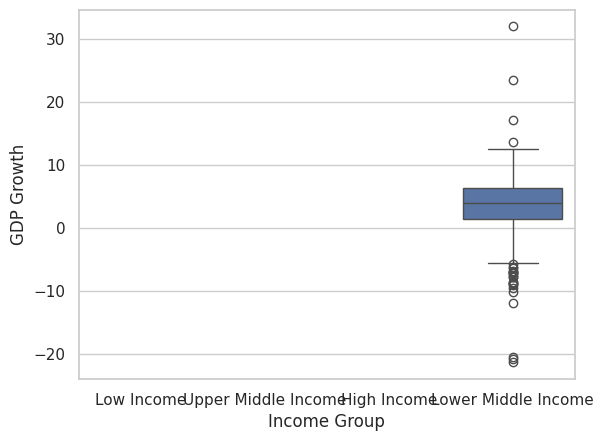

In [173]:
sns.boxplot(x=df_model['Income Group'], y=group_df['GDP Growth'])

Modeling with Income Group

In [174]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

results = []
for group in df_model['Income Group'].unique():
    group_df = df_model[df_model['Income Group'] == group]
    print(f"\n📊 Modeling for {group} countries — {len(group_df)} rows")

    X = group_df[valid_esg_columns]
    y = group_df['GDP Growth']
    if len(group_df) < 20:
        print("⚠️ Not enough data to train models reliably.")
        continue
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Linear Regression
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)
    r2_lr = r2_score(y_test, y_pred_lr)
    rmse_lr = mean_squared_error(y_test, y_pred_lr)

    # Random Forest
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    r2_rf = r2_score(y_test, y_pred_rf)
    rmse_rf = mean_squared_error(y_test, y_pred_rf)

    #XGBoost
    xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
    xgb.fit(X_train, y_train)
    y_pred_xgb = xgb.predict(X_test)
    r2_xgb = r2_score(y_test, y_pred_xgb)
    rmse_xgb = mean_squared_error(y_test, y_pred_xgb)

    # CatBoost
    cb = CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1, random_state=42, verbose=False)
    cb.fit(X_train, y_train)
    y_pred_cb = cb.predict(X_test)
    r2_cb = r2_score(y_test, y_pred_cb)
    rmse_cb = mean_squared_error(y_test, y_pred_cb)

    results.append({
        'Income Group': group,
        'Linear R²': round(r2_lr, 3),
        'Linear RMSE': round(rmse_lr, 3),
        'RF R²': round(r2_rf, 3),
        'RF RMSE': round(rmse_rf, 3),
        'XGB R²': round(r2_xgb, 3),
        'XGB RMSE': round(rmse_xgb, 3),
        'CatBoost R²': round(r2_cb, 3),
        'CatBoost RMSE': round(rmse_cb, 3)
    })

    print(f"🔹 Linear Regression R² = {r2_lr:.3f}, RMSE = {rmse_lr:.3f}")
    print(f"🔹 Random Forest     R² = {r2_rf:.3f}, RMSE = {rmse_rf:.3f}")
    print(f"🔹 XGBoost           R² = {r2_xgb:.3f}, RMSE = {rmse_xgb:.3f}")
    print(f"🔹 CatBoost          R² = {r2_cb:.3f}, RMSE = {rmse_cb:.3f}")


📊 Modeling for Low Income countries — 203 rows
🔹 Linear Regression R² = -0.069, RMSE = 22.639
🔹 Random Forest     R² = 0.139, RMSE = 18.224
🔹 XGBoost           R² = 0.163, RMSE = 17.720
🔹 CatBoost          R² = 0.077, RMSE = 19.535

📊 Modeling for Upper Middle Income countries — 476 rows
🔹 Linear Regression R² = 0.023, RMSE = 27.938
🔹 Random Forest     R² = -0.204, RMSE = 34.409
🔹 XGBoost           R² = -0.371, RMSE = 39.182
🔹 CatBoost          R² = -0.098, RMSE = 31.386

📊 Modeling for High Income countries — 556 rows
🔹 Linear Regression R² = -0.061, RMSE = 18.153
🔹 Random Forest     R² = -0.136, RMSE = 19.450
🔹 XGBoost           R² = -0.428, RMSE = 24.442
🔹 CatBoost          R² = -0.072, RMSE = 18.341

📊 Modeling for Lower Middle Income countries — 448 rows
🔹 Linear Regression R² = -0.027, RMSE = 14.652
🔹 Random Forest     R² = 0.001, RMSE = 14.252
🔹 XGBoost           R² = -0.248, RMSE = 17.807
🔹 CatBoost          R² = 0.065, RMSE = 13.338


Extract top ESG Features from each income group

In [175]:
top_features_by_group = {}

for group in df_model['Income Group'].unique():
    group_df = df_model[df_model['Income Group'] == group]
    print(f"\n📊 Analyzing features for {group} — {len(group_df)} rows")

    if len(group_df) < 20:
        print("⚠️ Not enough data.")
        continue
    feature_availability = group_df[valid_esg_columns].notna().sum().sort_values(ascending=False)
    most_complete_features = feature_availability.head(20).index.tolist()

    X = group_df[most_complete_features].dropna()
    y = group_df.loc[X.index,'GDP Growth']

    if X.shape[0] < 20:
        print("⚠️ Not enough complete rows for feature importance.")
        continue

    rf = RandomForestRegressor(random_state=42)
    rf.fit(X, y)

    importances = pd.Series(rf.feature_importances_, index=X.columns)
    top_3 = importances.sort_values(ascending=False).head(3)

    top_features_by_group[group] = top_3.index.tolist()

summary_table = pd.DataFrame.from_dict(top_features_by_group, orient='index')
summary_table.columns = ['Top 1 ESG Indicator', 'Top 2 ESG Indicator', 'Top 3 ESG Indicator']
summary_table = summary_table.reset_index().rename(columns={'index': 'Income Group'})
summary_table


📊 Analyzing features for Low Income — 203 rows

📊 Analyzing features for Upper Middle Income — 476 rows

📊 Analyzing features for High Income — 556 rows

📊 Analyzing features for Lower Middle Income — 448 rows


Income Group                                Top 1 ESG Indicator                                Top 2 ESG Indicator                                Top 3 ESG Indicator
0           Low Income  Access to clean fuels and technologies for coo...  Cause of death, by communicable diseases and m...                 Government Effectiveness: Estimate
1  Upper Middle Income            Food production index (2014-2016 = 100)                 Government Effectiveness: Estimate                    Control of Corruption: Estimate
2          High Income                 Government Effectiveness: Estimate  Energy intensity level of primary energy (MJ/$...  Government expenditure on education, total (% ...
3  Lower Middle Income  Agriculture, forestry, and fishing, value adde...            Food production index (2014-2016 = 100)                 Government Effectiveness: Estimate

Create lag features with top features by income group

In [176]:
def create_lagged_top_features(df_model, summary_table):
    df_esg_lagged = df_model[['Country Code', 'Year', 'Income Group']].copy()
    existing_cols = set(df_esg_lagged.columns)

    for _, row in summary_table.iterrows():
        group = row['Income Group']
        all_features = [row['Top 1 ESG Indicator'], row['Top 2 ESG Indicator'], row['Top 3 ESG Indicator']]
        valid_features = [f for f in all_features if f in df_model.columns]
        group_df = df_model[df_model['Income Group'] == group].copy()

        for feature in valid_features:
            for lag in [2, 5]:
                lag_col = f'{feature}_lag{lag}'
                group_df[lag_col] = group_df.groupby('Country Code')[feature].shift(lag)

        # Only merge columns that are NOT already in df_esg_lagged
        lagged_cols = [f'{feat}_lag{lag}' for feat in valid_features for lag in [2, 5]]
        new_cols = [col for col in lagged_cols if col not in existing_cols]

        if not new_cols:
            continue

        group_lagged = group_df[['Country Code', 'Year'] + new_cols].copy()
        group_lagged['Income Group'] = group
        df_esg_lagged = df_esg_lagged.merge(group_lagged, on=['Country Code', 'Year', 'Income Group'], how='left')
        existing_cols.update(new_cols)

    return df_esg_lagged

In [177]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def run_lagged_model_by_group(df_model, summary_table):
    df_esg_lagged = create_lagged_top_features(df_model, summary_table)
    df_full = df_model.merge(df_esg_lagged, on=['Country Code', 'Year', 'Income Group'], how='left')
    results = []

    for lag in [2, 5]:
        print(f"\n📊 Running models for lag-{lag} ESG features...")

        for _, row in summary_table.iterrows():
            group = row['Income Group']
            top_features = [row['Top 1 ESG Indicator'], row['Top 2 ESG Indicator'], row['Top 3 ESG Indicator']]
            lagged_features = [f"{feat}_lag{lag}" for feat in top_features if f"{feat}_lag{lag}" in df_full.columns]

            if len(lagged_features) < 2:
                print(f"⚠️ Not enough valid lagged features for {group} at lag {lag}. Skipping.")
                continue

            group_df = df_full[df_full['Income Group'] == group].dropna(subset=lagged_features + ['GDP Growth'])
            print(f"📈 {group} — {len(group_df)} rows using {len(lagged_features)} features")

            if len(group_df) < 20:
                print("⚠️ Skipping due to insufficient data.")
                continue

            X = group_df[lagged_features]
            y = group_df['GDP Growth']

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Train models
            lr = LinearRegression().fit(X_train, y_train)
            rf = RandomForestRegressor(random_state=42).fit(X_train, y_train)
            xgb = XGBRegressor(objective='reg:squarederror', random_state=42).fit(X_train, y_train)
            cb = CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1, verbose=0, random_state=42).fit(X_train, y_train)

            results.append({
                'Income Group': group,
                'Lag': f'lag_{lag}',
                'Features Used': ", ".join(lagged_features),
                'LR R²': round(r2_score(y_test, lr.predict(X_test)), 3),
                'LR RMSE': round(mean_squared_error(y_test, lr.predict(X_test)), 2),
                'RF R²': round(r2_score(y_test, rf.predict(X_test)), 3),
                'RF RMSE': round(mean_squared_error(y_test, rf.predict(X_test)), 2),
                'XGB R²': round(r2_score(y_test, xgb.predict(X_test)), 3),
                'XGB RMSE': round(mean_squared_error(y_test, xgb.predict(X_test)), 2),
                'CatBoost R²': round(r2_score(y_test, cb.predict(X_test)), 3),
                'CatBoost RMSE': round(mean_squared_error(y_test, cb.predict(X_test)), 2)
            })

    return pd.DataFrame(results)

In [178]:
df_results = run_lagged_model_by_group(df_model, summary_table)
print("\n✅ Lagged Top 3 ESG Features Model Results:")
df_results.head()


📊 Running models for lag-2 ESG features...
📈 Low Income — 155 rows using 3 features
📈 Upper Middle Income — 0 rows using 3 features
⚠️ Skipping due to insufficient data.
📈 High Income — 0 rows using 3 features
⚠️ Skipping due to insufficient data.
📈 Lower Middle Income — 0 rows using 3 features
⚠️ Skipping due to insufficient data.

📊 Running models for lag-5 ESG features...
📈 Low Income — 86 rows using 3 features
📈 Upper Middle Income — 0 rows using 3 features
⚠️ Skipping due to insufficient data.
📈 High Income — 0 rows using 3 features
⚠️ Skipping due to insufficient data.
📈 Lower Middle Income — 0 rows using 3 features
⚠️ Skipping due to insufficient data.

✅ Lagged Top 3 ESG Features Model Results:


Income Group    Lag                                      Features Used  LR R²  LR RMSE  RF R²  RF RMSE  XGB R²  XGB RMSE  CatBoost R²  CatBoost RMSE
0   Low Income  lag_2  Access to clean fuels and technologies for coo...  0.335     4.78  0.045     6.87  -0.465     10.52        0.217           5.63
1   Low Income  lag_5  Access to clean fuels and technologies for coo... -0.061    11.04 -0.514    15.76  -1.102     21.88       -0.562          16.25

Top Feature from E, S, G

In [179]:
#baseline benchmark
from sklearn.feature_selection import SelectKBest, mutual_info_regression
def select_top_features(df_pillar, k=3):
    X = df_pillar.drop(columns=['GDP Growth'])
    y = df_pillar['GDP Growth']
    X = X.fillna(X.mean())
    y = y.fillna(y.mean())
    # Feature selection
    selector = SelectKBest(mutual_info_regression, k=min(k, X.shape[1]))
    selector.fit(X, y)
    selected = X.columns[selector.get_support()]
    return list(selected)

top_e = select_top_features(df_e, k=3)
top_s = select_top_features(df_s, k=3)
top_g = select_top_features(df_g, k=3)

print("Top E:", top_e)
print("Top S:", top_s)
print("Top G:", top_g)

#combine selected features from all 3 pillars
selected_feature_file = "selected_columns.txt"
if os.path.exists(selected_feature_file):
    with open(selected_feature_file, "r") as f:
        selected_columns = f.read().splitlines()
else:
    selected_columns = top_e + top_s + top_g
    with open(selected_feature_file, "w") as f:
        f.write("\n".join(selected_columns))

df_model = df_merged[selected_columns + ['GDP Growth']].dropna()  # Drop rows with any missing values
X_selected = df_model[selected_columns]
y = df_model['GDP Growth']

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

def run_model(model, name, X_train, X_test, y_train, y_test, feature_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)
    print(f"\n{name} → R²: {r2:.4f}, RMSE: {rmse:.2f}")

    if hasattr(model, "feature_importances_"):
        importances = pd.Series(model.feature_importances_, index=feature_names)
        importances = importances.sort_values(ascending=False)
        print(f"🔍 {name} – Feature Importances:")
        print(importances)
        importances.to_csv(f"{name.replace(' ', '_')}_feature_importance.csv")

    return {'Model': name, 'R²': round(r2, 4), 'RMSE': round(rmse, 2)}
feature_names = X_selected.columns.tolist()
results = []
results.append(run_model(LinearRegression(), "📈 Linear Regression", X_train, X_test, y_train, y_test, feature_names))
results.append(run_model(RandomForestRegressor(random_state=42), "🌲 Random Forest", X_train, X_test, y_train, y_test, feature_names))
results.append(run_model(XGBRegressor(objective='reg:squarederror', random_state=42), "🚀 XGBoost", X_train, X_test, y_train, y_test, feature_names))
results.append(run_model(CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1, random_state=42, verbose=0),
                         "🐱 CatBoost", X_train, X_test, y_train, y_test, feature_names))

results_df = pd.DataFrame(results)
print("\n✅ Model Comparison Summary:")
display(results_df)

Top E: ['Agricultural land (% of land area)', 'Energy use (kg of oil equivalent per capita)', 'Fossil fuel energy consumption (% of total)']
Top S: ['Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)', 'Literacy rate, adult total (% of people ages 15 and above)', 'Mortality rate, under-5 (per 1,000 live births)']
Top G: ['Control of Corruption: Estimate', 'Regulatory Quality: Estimate', 'Voice and Accountability: Estimate']

📈 Linear Regression → R²: 0.0652, RMSE: 15.39

🌲 Random Forest → R²: -0.1380, RMSE: 18.73
🔍 🌲 Random Forest – Feature Importances:
Control of Corruption: Estimate                                                                          0.167268
Rule of Law: Estimate                                                                                    0.167188
Voice and Accountability: Estimate                                                                       0.140325
Mortality rate, under-5 (per 1,000 live births

Model      R²   RMSE
0  📈 Linear Regression  0.0652  15.39
1      🌲 Random Forest -0.1380  18.73
2            🚀 XGBoost -0.3540  22.29
3           🐱 CatBoost  0.0156  16.20

GDP Binary Classification

In [180]:
#Classify GDP growth whether is above or below a threshold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

df_model['GDP_Growth_Class'] = (df_model['GDP Growth'] > df_model['GDP Growth'].median()).astype(int)

X = df_model[selected_columns]
y = df_model['GDP_Growth_Class']

def evaluate_classifier(X, y, model, model_name, group_name=None, lag_label=None, use_smote=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    if use_smote:
        sm = SMOTE(random_state=42)
        X_train, y_train = sm.fit_resample(X_train, y_train)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    print(f"\n🧪 {model_name} Results:")
    print(f"Accuracy : {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall   : {rec:.3f}")
    print(f"F1 Score : {f1:.3f}")

    return {
        'Model': model_name + (" + SMOTE" if use_smote else ""),
        'Accuracy': round(acc, 3),
        'Precision': round(prec, 3),
        'Recall': round(rec, 3),
        'F1': round(f1, 3)
    }

classification_results = []

classification_results.append(evaluate_classifier(X, y, LogisticRegression(max_iter=1000), "Logistic Regression"))
classification_results.append(evaluate_classifier(X, y, RandomForestClassifier(random_state=42), "Random Forest"))
classification_results.append(evaluate_classifier(X, y, XGBClassifier(eval_metric='logloss', random_state=42), "XGBoost"))
classification_results.append(evaluate_classifier(X, y, CatBoostClassifier(verbose=0, random_state=42), "CatBoost"))
#add SMOTE version
classification_results.append(evaluate_classifier(X, y, LogisticRegression(max_iter=1000), "Logistic Regression", use_smote=True))
classification_results.append(evaluate_classifier(X, y, RandomForestClassifier(random_state=42), "Random Forest", use_smote=True))
classification_results.append(evaluate_classifier(X, y, XGBClassifier(eval_metric='logloss', random_state=42), "XGBoost", use_smote=True))
classification_results.append(evaluate_classifier(X, y, CatBoostClassifier(verbose=0, random_state=42), "CatBoost", use_smote=True))

classification_df = pd.DataFrame(classification_results)
print("\n✅ Classification Summary:")
display(classification_df.sort_values(by='F1', ascending=False))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




🧪 Logistic Regression Results:
Accuracy : 0.556
Precision: 0.538
Recall   : 0.602
F1 Score : 0.568

🧪 Random Forest Results:
Accuracy : 0.643
Precision: 0.628
Recall   : 0.651
F1 Score : 0.639

🧪 XGBoost Results:
Accuracy : 0.626
Precision: 0.607
Recall   : 0.651
F1 Score : 0.628

🧪 CatBoost Results:
Accuracy : 0.637
Precision: 0.621
Recall   : 0.651
F1 Score : 0.635


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




🧪 Logistic Regression Results:
Accuracy : 0.585
Precision: 0.571
Recall   : 0.578
F1 Score : 0.575

🧪 Random Forest Results:
Accuracy : 0.632
Precision: 0.614
Recall   : 0.651
F1 Score : 0.632

🧪 XGBoost Results:
Accuracy : 0.655
Precision: 0.633
Recall   : 0.687
F1 Score : 0.659

🧪 CatBoost Results:
Accuracy : 0.643
Precision: 0.628
Recall   : 0.651
F1 Score : 0.639

✅ Classification Summary:


Model  Accuracy  Precision  Recall     F1
6              XGBoost + SMOTE     0.655      0.633   0.687  0.659
1                Random Forest     0.643      0.628   0.651  0.639
7             CatBoost + SMOTE     0.643      0.628   0.651  0.639
3                     CatBoost     0.637      0.621   0.651  0.635
5        Random Forest + SMOTE     0.632      0.614   0.651  0.632
2                      XGBoost     0.626      0.607   0.651  0.628
4  Logistic Regression + SMOTE     0.585      0.571   0.578  0.575
0          Logistic Regression     0.556      0.538   0.602  0.568

With Lag Feature

In [181]:
#run classification model with lag features
def create_lagged_esg_features(df, selected_columns, lags=[2, 5]):
    df_model = df.copy()
    df_lagged = df_model[['Country Code', 'Year', 'Income Group']].copy()
    for feature in selected_columns:
        for lag in lags:
            col_name = f"{feature}_lag{lag}"
            df_model[col_name] = df_model.groupby('Country Code')[feature].shift(lag)
            df_lagged[col_name] = df_model[col_name]
    df_lagged['GDP Growth'] = df_model['GDP Growth']
    df_lagged['Country Code'] = df_model['Country Code']
    df_lagged['Year'] = df_model['Year']
    return df_lagged
df_lagged = create_lagged_esg_features(df_final_clean.copy(), selected_columns, lags=[2, 5])

In [182]:
classification_results = []

for lag in [2, 5]:
    print(f"\n📊 Running classification using lag-{lag} features...")

    lagged_cols = [f"{feat}_lag{lag}" for feat in selected_columns]
    required_cols = lagged_cols + ['GDP Growth']
    df_clean = df_lagged.dropna(subset=required_cols).copy()

    df_clean['GDP_Growth_Class'] = (df_clean['GDP Growth'] > df_clean['GDP Growth'].median()).astype(int)

    X = df_clean[lagged_cols]
    y = df_clean['GDP_Growth_Class']

    classification_results.append(evaluate_classifier(X, y, LogisticRegression(max_iter=1000), 'LR', lag_label=f"Lag-{lag}", use_smote=False))
    classification_results.append(evaluate_classifier(X, y, RandomForestClassifier(random_state=42), 'RF', lag_label=f"Lag-{lag}", use_smote=True))
    classification_results.append(evaluate_classifier(X, y, XGBClassifier(eval_metric='logloss', random_state=42), 'XGB', lag_label=f"Lag-{lag}", use_smote=True))
    classification_results.append(evaluate_classifier(X, y, CatBoostClassifier(verbose=0, random_state=42), 'CB', lag_label=f"Lag-{lag}", use_smote=True))

results_df = pd.DataFrame(classification_results)
print("\n✅ Lagged ESG Classification Results:")
display(results_df)


📊 Running classification using lag-2 features...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




🧪 LR Results:
Accuracy : 0.541
Precision: 0.514
Recall   : 0.571
F1 Score : 0.541

🧪 RF Results:
Accuracy : 0.669
Precision: 0.651
Recall   : 0.651
F1 Score : 0.651

🧪 XGB Results:
Accuracy : 0.692
Precision: 0.667
Recall   : 0.698
F1 Score : 0.682

🧪 CB Results:
Accuracy : 0.684
Precision: 0.678
Recall   : 0.635
F1 Score : 0.656

📊 Running classification using lag-5 features...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




🧪 LR Results:
Accuracy : 0.434
Precision: 0.474
Recall   : 0.439
F1 Score : 0.456

🧪 RF Results:
Accuracy : 0.539
Precision: 0.583
Recall   : 0.512
F1 Score : 0.545

🧪 XGB Results:
Accuracy : 0.553
Precision: 0.595
Recall   : 0.537
F1 Score : 0.564

🧪 CB Results:
Accuracy : 0.539
Precision: 0.594
Recall   : 0.463
F1 Score : 0.521

✅ Lagged ESG Classification Results:


Model  Accuracy  Precision  Recall     F1
0           LR     0.541      0.514   0.571  0.541
1   RF + SMOTE     0.669      0.651   0.651  0.651
2  XGB + SMOTE     0.692      0.667   0.698  0.682
3   CB + SMOTE     0.684      0.678   0.635  0.656
4           LR     0.434      0.474   0.439  0.456
5   RF + SMOTE     0.539      0.583   0.512  0.545
6  XGB + SMOTE     0.553      0.595   0.537  0.564
7   CB + SMOTE     0.539      0.594   0.463  0.521

In [183]:
#ESG lag with income group only for comparison
classification_results = []
for lag in [2, 5]:
    lagged_cols = [f"{feat}_lag{lag}" for feat in selected_columns]
    required_cols = lagged_cols + ['GDP Growth']
    df_clean = df_lagged.dropna(subset=required_cols).copy()
    df_clean['GDP_Growth_Class'] = (df_clean['GDP Growth'] > df_clean['GDP Growth'].median()).astype(int)

    for group in df_clean['Income Group'].dropna().unique():
        subset = df_clean[df_clean['Income Group'] == group].copy()
        subset = subset.dropna(subset=lagged_cols)
        if len(subset) < 30:
            print(f"⚠️ Skipping {group} (ESG Only) - not enough rows: {len(subset)}")
            continue
        X = subset[lagged_cols]
        y = subset['GDP_Growth_Class']

        result = evaluate_classifier(X, y, LogisticRegression(max_iter=1000), 'LR', lag_label=f"Lag-{lag}", use_smote=False)
        result['Income Group'] = group
        classification_results.append(result)
        result = evaluate_classifier(X, y, RandomForestClassifier(random_state=42), 'RF + SMOTE', lag_label=f"Lag-{lag}", use_smote=True)
        result['Income Group'] = group
        classification_results.append(result)
        result = evaluate_classifier(X, y, XGBClassifier(eval_metric='logloss', random_state=42), 'XGB + SMOTE', lag_label=f"Lag-{lag}", use_smote=True)
        result['Income Group'] = group
        classification_results.append(result)
        result = evaluate_classifier(X, y, CatBoostClassifier(verbose=0, random_state=42), 'CB + SMOTE', lag_label=f"Lag-{lag}", use_smote=True)
        result['Income Group'] = group
        classification_results.append(result)


results_by_income_group = pd.DataFrame(classification_results)
print("\n✅ Lagged ESG Classification Results with Income Group:")
display(results_by_income_group)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




🧪 LR Results:
Accuracy : 0.551
Precision: 0.438
Recall   : 0.350
F1 Score : 0.389

🧪 RF + SMOTE Results:
Accuracy : 0.653
Precision: 0.560
Recall   : 0.700
F1 Score : 0.622

🧪 XGB + SMOTE Results:
Accuracy : 0.592
Precision: 0.500
Recall   : 0.600
F1 Score : 0.545

🧪 CB + SMOTE Results:
Accuracy : 0.571
Precision: 0.481
Recall   : 0.650
F1 Score : 0.553

🧪 LR Results:
Accuracy : 0.744
Precision: 0.826
Recall   : 0.760
F1 Score : 0.792

🧪 RF + SMOTE Results:
Accuracy : 0.769
Precision: 0.833
Recall   : 0.800
F1 Score : 0.816

🧪 XGB + SMOTE Results:
Accuracy : 0.769
Precision: 0.833
Recall   : 0.800
F1 Score : 0.816

🧪 CB + SMOTE Results:
Accuracy : 0.821
Precision: 0.846
Recall   : 0.880
F1 Score : 0.863

🧪 LR Results:
Accuracy : 0.571
Precision: 0.556
Recall   : 0.588
F1 Score : 0.571

🧪 RF + SMOTE Results:
Accuracy : 0.629
Precision: 0.667
Recall   : 0.471
F1 Score : 0.552

🧪 XGB + SMOTE Results:
Accuracy : 0.657
Precision: 0.692
Recall   : 0.529
F1 Score : 0.600

🧪 CB + SMOTE Result

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




🧪 RF + SMOTE Results:
Accuracy : 0.536
Precision: 0.286
Recall   : 0.200
F1 Score : 0.235

🧪 XGB + SMOTE Results:
Accuracy : 0.429
Precision: 0.200
Recall   : 0.200
F1 Score : 0.200

🧪 CB + SMOTE Results:
Accuracy : 0.464
Precision: 0.222
Recall   : 0.200
F1 Score : 0.211

🧪 LR Results:
Accuracy : 0.565
Precision: 0.462
Recall   : 0.667
F1 Score : 0.545

🧪 RF + SMOTE Results:
Accuracy : 0.565
Precision: 0.467
Recall   : 0.778
F1 Score : 0.583

🧪 XGB + SMOTE Results:
Accuracy : 0.696
Precision: 0.571
Recall   : 0.889
F1 Score : 0.696

🧪 CB + SMOTE Results:
Accuracy : 0.609
Precision: 0.500
Recall   : 0.889
F1 Score : 0.640

🧪 LR Results:
Accuracy : 0.500
Precision: 0.571
Recall   : 0.667
F1 Score : 0.615


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




🧪 RF + SMOTE Results:
Accuracy : 0.500
Precision: 0.625
Recall   : 0.417
F1 Score : 0.500

🧪 XGB + SMOTE Results:
Accuracy : 0.300
Precision: 0.333
Recall   : 0.167
F1 Score : 0.222

🧪 CB + SMOTE Results:
Accuracy : 0.500
Precision: 0.625
Recall   : 0.417
F1 Score : 0.500
⚠️ Skipping Low Income (ESG Only) - not enough rows: 27

✅ Lagged ESG Classification Results with Income Group:


Model  Accuracy  Precision  Recall     F1         Income Group
0                    LR     0.551      0.438   0.350  0.389  Upper Middle Income
1    RF + SMOTE + SMOTE     0.653      0.560   0.700  0.622  Upper Middle Income
2   XGB + SMOTE + SMOTE     0.592      0.500   0.600  0.545  Upper Middle Income
3    CB + SMOTE + SMOTE     0.571      0.481   0.650  0.553  Upper Middle Income
4                    LR     0.744      0.826   0.760  0.792  Lower Middle Income
..                  ...       ...        ...     ...    ...                  ...
23   CB + SMOTE + SMOTE     0.609      0.500   0.889  0.640  Lower Middle Income
24                   LR     0.500      0.571   0.667  0.615          High Income
25   RF + SMOTE + SMOTE     0.500      0.625   0.417  0.500          High Income
26  XGB + SMOTE + SMOTE     0.300      0.333   0.167  0.222          High Income
27   CB + SMOTE + SMOTE     0.500      0.625   0.417  0.500          High Income

[28 rows x 6 columns]

ADD GDP Growth from Previous Year

In [184]:
def create_lagged_esg_features(df, selected_columns, lags=[2, 5]):
    df_model = df.copy()
    df_lagged = df_model[['Country Code', 'Year', 'Income Group']].copy()

    for feature in selected_columns:
        for lag in lags:
            col_name = f"{feature}_lag{lag}"
            df_model[col_name] = df_model.groupby('Country Code')[feature].shift(lag)
            df_lagged[col_name] = df_model[col_name]

    # Add GDP Growth and GDP_Growth_Lag1
    df_lagged['GDP Growth'] = df_model['GDP Growth']
    df_lagged['GDP_Growth_Lag1'] = df_model.groupby('Country Code')['GDP Growth'].shift(1)

    df_lagged['Country Code'] = df_model['Country Code']
    df_lagged['Year'] = df_model['Year']
    return df_lagged
#recreate dataframe with lag GDP
df_lagged = create_lagged_esg_features(df_final_clean.copy(), selected_columns, lags=[2, 5])

Running Model with Voting and Stacking Classifier

In [185]:
#GDP lag and ESG lag combination
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
classification_results = []

for lag in [2, 5]:
    print(f"\n📊 Running classification by Income Group using lag-{lag} features + GDP lag...")

    lagged_cols = [f"{feat}_lag{lag}" for feat in selected_columns]
    feature_set = lagged_cols + ['GDP_Growth_Lag1']

    for group in df_lagged['Income Group'].dropna().unique():
        subset = df_lagged[df_lagged['Income Group'] == group].copy()
        subset = subset.dropna(subset=feature_set).copy()
        subset['GDP_Growth_Class'] = (subset['GDP Growth'] > subset['GDP Growth'].median()).astype(int)

        if len(subset) < 30:
            print(f"⚠️ Skipping {group} - only {len(subset)} usable rows.")
            continue

        X = subset[feature_set]
        y = subset['GDP_Growth_Class']

        # Base models
        lr = LogisticRegression(max_iter=1000)
        rf = RandomForestClassifier(random_state=42)
        xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
        cb = CatBoostClassifier(verbose=0, random_state=42)

        # Voting Classifier
        voting = VotingClassifier(estimators=[
            ('lr', lr), ('rf', rf), ('xgb', xgb), ('cb', cb)
        ], voting='soft')

        # Stacking Classifier
        stacking = StackingClassifier(estimators=[
            ('lr', lr), ('rf', rf), ('xgb', xgb), ('cb', cb)
        ], final_estimator=LogisticRegression(max_iter=1000))

        classification_results.append(evaluate_classifier(X, y, lr, f'LR_lag{lag}_{group}'))
        classification_results.append(evaluate_classifier(X, y, rf, f'RF_lag{lag}_{group}'))
        classification_results.append(evaluate_classifier(X, y, xgb, f'XGB_lag{lag}_{group}'))
        classification_results.append(evaluate_classifier(X, y, cb, f'CB_lag{lag}_{group}'))
        classification_results.append(evaluate_classifier(X, y, voting, f'Voting_lag{lag}_{group}'))
        classification_results.append(evaluate_classifier(X, y, stacking, f'Stacking_lag{lag}_{group}'))

results_by_gdp = pd.DataFrame(classification_results)
display(results_by_gdp.sort_values(by="F1", ascending=False))


📊 Running classification by Income Group using lag-2 features + GDP lag...

🧪 LR_lag2_Low Income Results:
Accuracy : 0.583
Precision: 0.750
Recall   : 0.429
F1 Score : 0.545

🧪 RF_lag2_Low Income Results:
Accuracy : 0.667
Precision: 0.800
Recall   : 0.571
F1 Score : 0.667

🧪 XGB_lag2_Low Income Results:
Accuracy : 0.833
Precision: 0.857
Recall   : 0.857
F1 Score : 0.857


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[03:26:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.





🧪 CB_lag2_Low Income Results:
Accuracy : 0.750
Precision: 1.000
Recall   : 0.571
F1 Score : 0.727


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[03:26:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.





🧪 Voting_lag2_Low Income Results:
Accuracy : 0.750
Precision: 0.833
Recall   : 0.714
F1 Score : 0.769


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[03:26:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[03:26:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[03:26:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[03:26:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[03:26:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[03:26


🧪 Stacking_lag2_Low Income Results:
Accuracy : 0.667
Precision: 0.800
Recall   : 0.571
F1 Score : 0.667

🧪 LR_lag2_Upper Middle Income Results:
Accuracy : 0.607
Precision: 0.714
Recall   : 0.357
F1 Score : 0.476


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




🧪 RF_lag2_Upper Middle Income Results:
Accuracy : 0.464
Precision: 0.444
Recall   : 0.286
F1 Score : 0.348

🧪 XGB_lag2_Upper Middle Income Results:
Accuracy : 0.518
Precision: 0.529
Recall   : 0.321
F1 Score : 0.400


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[03:26:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.





🧪 CB_lag2_Upper Middle Income Results:
Accuracy : 0.482
Precision: 0.471
Recall   : 0.286
F1 Score : 0.356


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[03:26:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.





🧪 Voting_lag2_Upper Middle Income Results:
Accuracy : 0.464
Precision: 0.438
Recall   : 0.250
F1 Score : 0.318


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[03:26:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer t


🧪 Stacking_lag2_Upper Middle Income Results:
Accuracy : 0.500
Precision: 0.000
Recall   : 0.000
F1 Score : 0.000

🧪 LR_lag2_High Income Results:
Accuracy : 0.450
Precision: 0.286
Recall   : 0.250
F1 Score : 0.267


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




🧪 RF_lag2_High Income Results:
Accuracy : 0.625
Precision: 0.545
Recall   : 0.375
F1 Score : 0.444

🧪 XGB_lag2_High Income Results:
Accuracy : 0.600
Precision: 0.500
Recall   : 0.312
F1 Score : 0.385


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[03:26:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.





🧪 CB_lag2_High Income Results:
Accuracy : 0.600
Precision: 0.500
Recall   : 0.312
F1 Score : 0.385


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[03:27:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.





🧪 Voting_lag2_High Income Results:
Accuracy : 0.600
Precision: 0.500
Recall   : 0.250
F1 Score : 0.333


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[03:27:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer t


🧪 Stacking_lag2_High Income Results:
Accuracy : 0.575
Precision: 0.429
Recall   : 0.188
F1 Score : 0.261

🧪 LR_lag2_Lower Middle Income Results:
Accuracy : 0.556
Precision: 0.611
Recall   : 0.458
F1 Score : 0.524

🧪 RF_lag2_Lower Middle Income Results:
Accuracy : 0.622
Precision: 0.640
Recall   : 0.667
F1 Score : 0.653

🧪 XGB_lag2_Lower Middle Income Results:
Accuracy : 0.600
Precision: 0.650
Recall   : 0.542
F1 Score : 0.591


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[03:27:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.





🧪 CB_lag2_Lower Middle Income Results:
Accuracy : 0.578
Precision: 0.600
Recall   : 0.625
F1 Score : 0.612


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[03:27:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.





🧪 Voting_lag2_Lower Middle Income Results:
Accuracy : 0.578
Precision: 0.609
Recall   : 0.583
F1 Score : 0.596


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[03:27:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer t


🧪 Stacking_lag2_Lower Middle Income Results:
Accuracy : 0.578
Precision: 0.632
Recall   : 0.500
F1 Score : 0.558

📊 Running classification by Income Group using lag-5 features + GDP lag...

🧪 LR_lag5_Low Income Results:
Accuracy : 0.857
Precision: 1.000
Recall   : 0.500
F1 Score : 0.667

🧪 RF_lag5_Low Income Results:
Accuracy : 0.714
Precision: 0.000
Recall   : 0.000
F1 Score : 0.000

🧪 XGB_lag5_Low Income Results:
Accuracy : 0.714
Precision: 0.500
Recall   : 0.500
F1 Score : 0.500


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[03:27:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.





🧪 CB_lag5_Low Income Results:
Accuracy : 0.714
Precision: 0.000
Recall   : 0.000
F1 Score : 0.000


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[03:27:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.





🧪 Voting_lag5_Low Income Results:
Accuracy : 0.857
Precision: 1.000
Recall   : 0.500
F1 Score : 0.667


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[03:27:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[03:27:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[03:27:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_en


🧪 Stacking_lag5_Low Income Results:
Accuracy : 0.714
Precision: 0.000
Recall   : 0.000
F1 Score : 0.000

🧪 LR_lag5_Upper Middle Income Results:
Accuracy : 0.714
Precision: 0.533
Recall   : 0.727
F1 Score : 0.615


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




🧪 RF_lag5_Upper Middle Income Results:
Accuracy : 0.571
Precision: 0.333
Recall   : 0.364
F1 Score : 0.348

🧪 XGB_lag5_Upper Middle Income Results:
Accuracy : 0.571
Precision: 0.300
Recall   : 0.273
F1 Score : 0.286


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[03:27:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.





🧪 CB_lag5_Upper Middle Income Results:
Accuracy : 0.543
Precision: 0.308
Recall   : 0.364
F1 Score : 0.333


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[03:27:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.





🧪 Voting_lag5_Upper Middle Income Results:
Accuracy : 0.571
Precision: 0.333
Recall   : 0.364
F1 Score : 0.348


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[03:27:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer t


🧪 Stacking_lag5_Upper Middle Income Results:
Accuracy : 0.629
Precision: 0.375
Recall   : 0.273
F1 Score : 0.316

🧪 LR_lag5_High Income Results:
Accuracy : 0.480
Precision: 0.167
Recall   : 0.111
F1 Score : 0.133


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




🧪 RF_lag5_High Income Results:
Accuracy : 0.560
Precision: 0.375
Recall   : 0.333
F1 Score : 0.353

🧪 XGB_lag5_High Income Results:
Accuracy : 0.600
Precision: 0.429
Recall   : 0.333
F1 Score : 0.375


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[03:27:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.





🧪 CB_lag5_High Income Results:
Accuracy : 0.600
Precision: 0.429
Recall   : 0.333
F1 Score : 0.375


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[03:28:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.





🧪 Voting_lag5_High Income Results:
Accuracy : 0.640
Precision: 0.500
Recall   : 0.444
F1 Score : 0.471


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[03:28:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer t


🧪 Stacking_lag5_High Income Results:
Accuracy : 0.600
Precision: 0.000
Recall   : 0.000
F1 Score : 0.000

🧪 LR_lag5_Lower Middle Income Results:
Accuracy : 0.643
Precision: 0.500
Recall   : 0.200
F1 Score : 0.286

🧪 RF_lag5_Lower Middle Income Results:
Accuracy : 0.536
Precision: 0.333
Recall   : 0.300
F1 Score : 0.316

🧪 XGB_lag5_Lower Middle Income Results:
Accuracy : 0.607
Precision: 0.444
Recall   : 0.400
F1 Score : 0.421


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[03:28:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.





🧪 CB_lag5_Lower Middle Income Results:
Accuracy : 0.571
Precision: 0.375
Recall   : 0.300
F1 Score : 0.333


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[03:28:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.





🧪 Voting_lag5_Lower Middle Income Results:
Accuracy : 0.643
Precision: 0.500
Recall   : 0.400
F1 Score : 0.444


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[03:28:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[03:28:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[03:28:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[03:28:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[03:28:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[03:28


🧪 Stacking_lag5_Lower Middle Income Results:
Accuracy : 0.643
Precision: 0.000
Recall   : 0.000
F1 Score : 0.000


Model  Accuracy  Precision  Recall     F1
2                 XGB_lag2_Low Income     0.833      0.857   0.857  0.857
4              Voting_lag2_Low Income     0.750      0.833   0.714  0.769
3                  CB_lag2_Low Income     0.750      1.000   0.571  0.727
1                  RF_lag2_Low Income     0.667      0.800   0.571  0.667
5            Stacking_lag2_Low Income     0.667      0.800   0.571  0.667
..                                ...       ...        ...     ...    ...
25                 RF_lag5_Low Income     0.714      0.000   0.000  0.000
29           Stacking_lag5_Low Income     0.714      0.000   0.000  0.000
27                 CB_lag5_Low Income     0.714      0.000   0.000  0.000
41          Stacking_lag5_High Income     0.600      0.000   0.000  0.000
47  Stacking_lag5_Lower Middle Income     0.643      0.000   0.000  0.000

[48 rows x 5 columns]

In [186]:
print(df_lagged.columns)

Index(['Country Code', 'Year', 'Income Group', 'Agricultural land (% of land area)_lag2', 'Agricultural land (% of land area)_lag5', 'Energy use (kg of oil equivalent per capita)_lag2', 'Energy use (kg of oil equivalent per capita)_lag5', 'Fossil fuel energy consumption (% of total)_lag2', 'Fossil fuel energy consumption (% of total)_lag5', 'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)_lag2', 'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)_lag5', 'Literacy rate, adult total (% of people ages 15 and above)_lag2', 'Literacy rate, adult total (% of people ages 15 and above)_lag5', 'Mortality rate, under-5 (per 1,000 live births)_lag2', 'Mortality rate, under-5 (per 1,000 live births)_lag5', 'Control of Corruption: Estimate_lag2', 'Control of Corruption: Estimate_lag5', 'Rule of Law: Estimate_lag2', 'Rule of Law: Estimate_lag5', 'Voice and Accountability: Estimate_lag2', 'Voice a

In [187]:
results_with_gdp_lag_income_group = results_by_gdp.copy()
results_with_gdp_lag_income_group['Income Group'] = df_lagged['Income Group']

In [188]:
#to understand is gdp lag perform better
results_without_gdp_lag = results_by_income_group.copy()
results_without_gdp_lag['Lag_Type'] = 'ESG Only'
results_with_gdp_lag = results_with_gdp_lag_income_group.copy()
results_with_gdp_lag['Lag_Type'] = 'ESG + GDP Lag'
combined_results = pd.concat([results_without_gdp_lag, results_with_gdp_lag], ignore_index=True)
summary_table = (
    combined_results
    .groupby(['Income Group', 'Lag_Type'])
    [['Accuracy', 'Precision', 'Recall', 'F1']]
    .mean()
    .reset_index()
)
for group in summary_table['Income Group'].dropna().unique():
    print(f"\n📂 Summary for {group}")
    display(summary_table[summary_table['Income Group'] == group])


📂 Summary for High Income


Income Group       Lag_Type  Accuracy  Precision    Recall        F1
0  High Income  ESG + GDP Lag  0.582111   0.350333  0.349111  0.345222
1  High Income       ESG Only  0.542875   0.594625  0.487875  0.528375


📂 Summary for Low Income


Income Group       Lag_Type  Accuracy  Precision  Recall      F1
2   Low Income  ESG + GDP Lag    0.6321    0.71980  0.4963  0.5812
3   Low Income       ESG Only    0.7750    0.69175  1.0000  0.8170


📂 Summary for Lower Middle Income


Income Group       Lag_Type  Accuracy  Precision    Recall        F1
4  Lower Middle Income  ESG + GDP Lag  0.609222   0.342333  0.264111  0.294000
5  Lower Middle Income       ESG Only  0.692250   0.667250  0.807875  0.718875


📂 Summary for Upper Middle Income


Income Group       Lag_Type  Accuracy  Precision  Recall        F1
6  Upper Middle Income  ESG + GDP Lag    0.6248     0.4720  0.3406  0.388050
7  Upper Middle Income       ESG Only    0.5415     0.3775  0.4000  0.383875

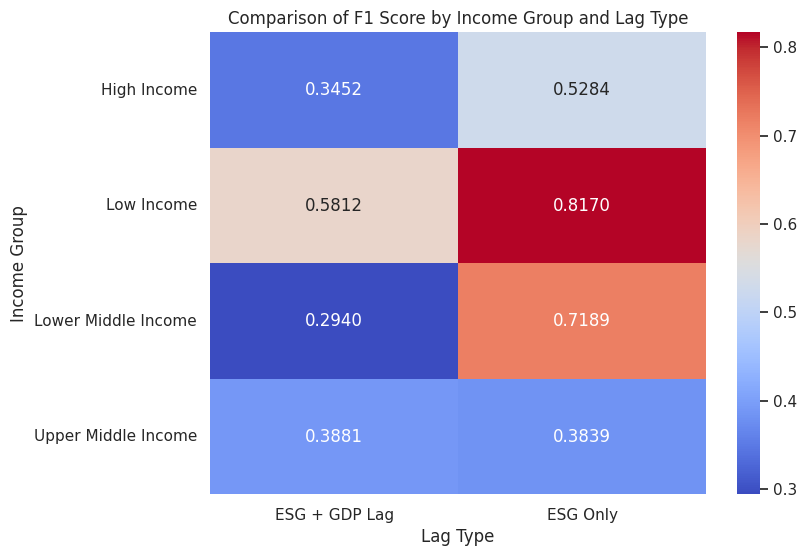

In [189]:
#heatmap to see which lag type perform better in each income group
heatmap_data = summary_table.pivot(index='Income Group', columns='Lag_Type', values='F1')
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.4f', cbar=True)
plt.title("Comparison of F1 Score by Income Group and Lag Type")
plt.xlabel('Lag Type')
plt.ylabel('Income Group')
plt.show()

Regional Classification

In [190]:
#Classify Country by Region with same ESG challenges
url = "https://github.com/young9496/ESG-Data/raw/refs/heads/main/Regional%20Country.xlsx"
regional_df = pd.read_excel(url, sheet_name=None)
print(regional_df)

{'Sheet1':                   Region       Country Name Country Code
0    East Asia & Pacific     American Samoa          NaN
1    East Asia & Pacific          Australia          AUS
2    East Asia & Pacific  Brunei Darussalam          BRN
3    East Asia & Pacific           Cambodia          KHM
4    East Asia & Pacific              China          CHN
..                   ...                ...          ...
213   Sub-Saharan Africa           Tanzania          TZA
214   Sub-Saharan Africa               Togo          TGO
215   Sub-Saharan Africa             Uganda          UGA
216   Sub-Saharan Africa             Zambia          ZMB
217   Sub-Saharan Africa           Zimbabwe          ZWE

[218 rows x 3 columns]}


In [191]:
print("✅ Sheet names:", regional_df.keys())
regional_df = pd.read_excel(url, sheet_name='Sheet1')
print(regional_df.head())

✅ Sheet names: dict_keys(['Sheet1'])
                Region       Country Name Country Code
0  East Asia & Pacific     American Samoa          NaN
1  East Asia & Pacific          Australia          AUS
2  East Asia & Pacific  Brunei Darussalam          BRN
3  East Asia & Pacific           Cambodia          KHM
4  East Asia & Pacific              China          CHN


In [192]:
available_countries = df_final_clean['Country Name'].unique()
regional_df_filtered = regional_df[regional_df['Country Name'].isin(available_countries)]
print(f"✅ Regional countries after filtering: {len(regional_df_filtered)} out of {len(regional_df)}")
print("📌 Sample of matched countries:\n", regional_df_filtered['Country Name'].head())

✅ Regional countries after filtering: 192 out of 218
📌 Sample of matched countries:
 1            Australia
2    Brunei Darussalam
3             Cambodia
4                China
5                 Fiji
Name: Country Name, dtype: object


In [193]:
df_final_with_region = pd.merge(
    df_final_clean,
    regional_df_filtered[['Country Name', 'Region']],
    on='Country Name',
    how='left'
)


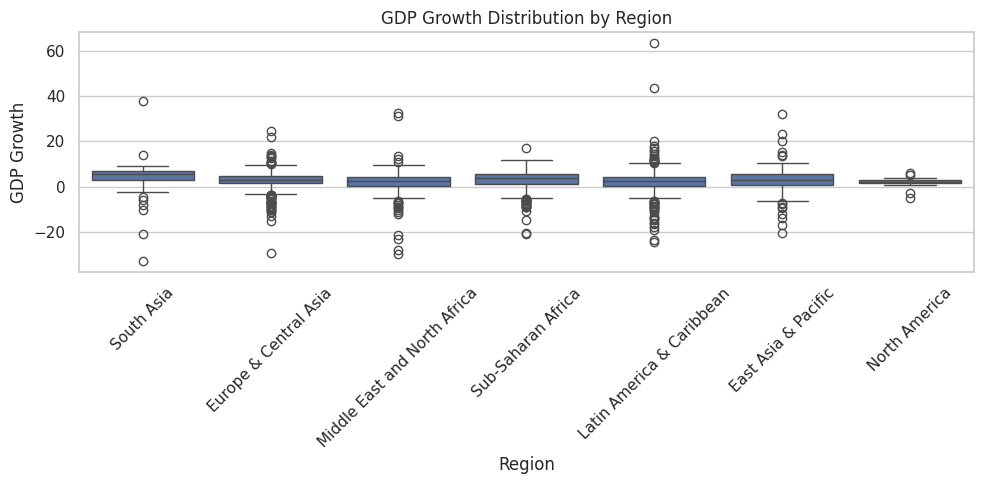

In [194]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_final_with_region, x='Region', y='GDP Growth')
plt.title('GDP Growth Distribution by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

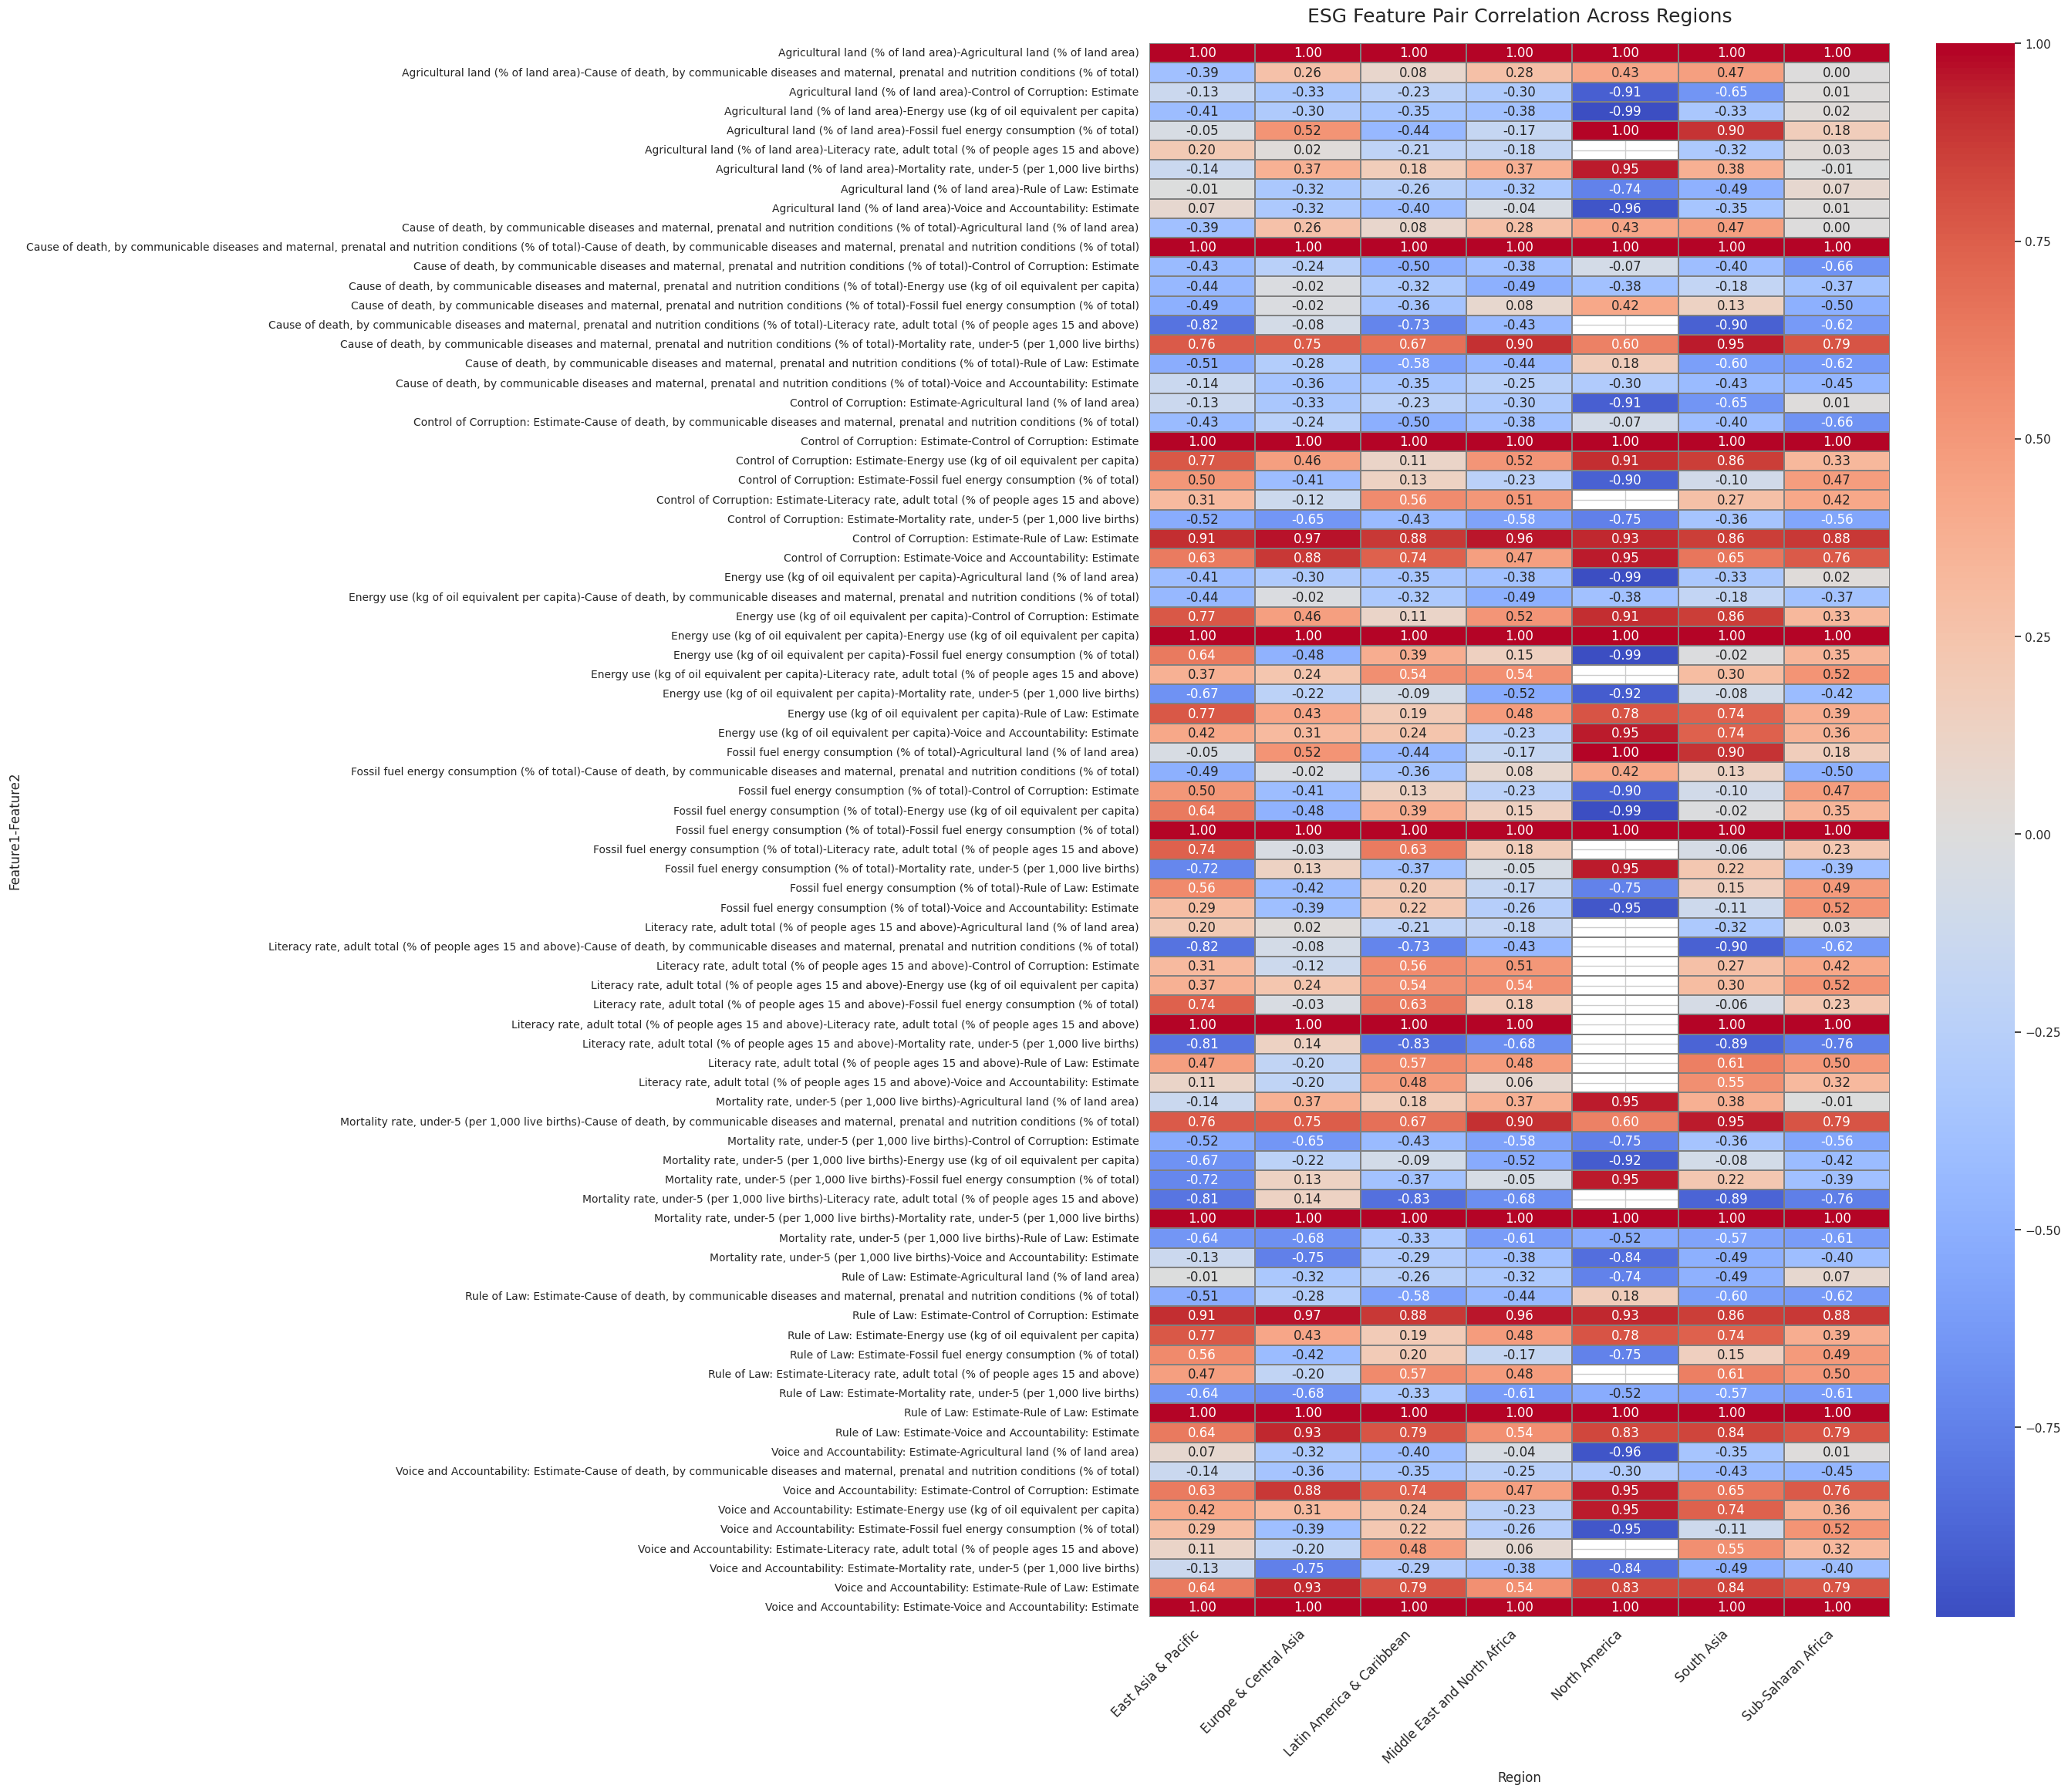

In [195]:
region_corrs = []

for region in df_final_with_region['Region'].dropna().unique():
    subset = df_final_with_region[df_final_with_region['Region'] == region]
    corr = subset[selected_columns].corr().stack().reset_index()
    corr.columns = ['Feature1', 'Feature2', 'Correlation']
    corr['Region'] = region
    region_corrs.append(corr)

combined_df = pd.concat(region_corrs)
pivot_corr = combined_df.pivot_table(index=['Feature1', 'Feature2'], columns='Region', values='Correlation')
plt.figure(figsize=(20, 30))
sns.heatmap(pivot_corr, cmap='coolwarm', center=0, annot=True, fmt=".2f", cbar=True, linewidths=0.3, linecolor='gray')
plt.title('ESG Feature Pair Correlation Across Regions', fontsize = 18, pad = 20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=10)
plt.subplots_adjust(left=0.3, bottom=0.2)
plt.show()

In [196]:
unmatched = regional_df[~regional_df['Country Name'].isin(available_countries)]
print("🔍 Unmatched countries from regional file:\n", unmatched['Country Name'].tolist())

🔍 Unmatched countries from regional file:
 ['American Samoa', 'French Polynesia', 'Guam', 'Hong Kong SAR, China', 'Macao SAR, China', 'New Caledonia', 'Northern Mariana Islands', 'Taiwan, China', 'Channel Islands', 'Faroe Islands', 'Gibraltar', 'Greenland', 'Isle of Man', 'Kosovo', 'Aruba', 'British Virgin Islands', 'Cayman Islands', 'Curacao', 'Puerto Rico', 'Sint Maarten (Dutch part)', 'St. Martin (French part)', 'Turks and Caicos Islands', 'Venezuela, RB', 'Virgin Islands (U.S.)', 'West Bank and Gaza', 'Bermuda']


In [197]:
df_lagged = create_lagged_esg_features(df_final_with_region.copy(), selected_columns, lags=[2, 5])
df_lagged['Region'] = df_final_with_region['Region']

In [198]:
def evaluate_classifier(X, y, model, model_name, region_name, lag_label, use_smote=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    if use_smote:
        sm = SMOTE(random_state=42)
        X_train, y_train = sm.fit_resample(X_train, y_train)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    return {
        'Region': region_name,
        'Lag': lag_label,
        'Model': model_name + (" + SMOTE" if use_smote else ""),
        'Accuracy': round(accuracy_score(y_test, y_pred), 3),
        'Precision': round(precision_score(y_test, y_pred), 3),
        'Recall': round(recall_score(y_test, y_pred), 3),
        'F1': round(f1_score(y_test, y_pred), 3)
    }


In [199]:
classification_results_region = []

for lag in [2, 5]:
    lagged_cols = [f"{feat}_lag{lag}" for feat in selected_columns]
    feature_set = lagged_cols + ['GDP_Growth_Lag1']

    print(f"\n🌍 Running classifiers using lag-{lag} features by Region...")

    for region in df_lagged['Region'].dropna().unique():
        subset = df_lagged[df_lagged['Region'] == region].copy()
        subset = subset.dropna(subset=feature_set + ['GDP Growth'])

        subset['GDP_Growth_Class'] = (subset['GDP Growth'] > subset['GDP Growth'].median()).astype(int)

        if len(subset) < 30:
            print(f"⚠️ Skipping {region} — only {len(subset)} usable rows.")
            continue

        X = subset[feature_set]
        y = subset['GDP_Growth_Class']

        classification_results_region.append(evaluate_classifier(X, y, LogisticRegression(max_iter=1000),'LR', region, lag))
        classification_results_region.append(evaluate_classifier(X, y, RandomForestClassifier(random_state=42),'RF', region, lag))
        classification_results_region.append(evaluate_classifier(X, y, XGBClassifier(eval_metric='logloss', random_state=42),'XGB', region, lag))
        classification_results_region.append(evaluate_classifier(X, y, CatBoostClassifier(verbose=0, random_state=42),'CB', region, lag))
results_by_region = pd.DataFrame(classification_results_region)
results_by_region['Lag'] = results_by_region['Lag'].astype(int)
display(results_by_region.sort_values(by=['Region', 'Lag', 'F1'], ascending=[True, True, False]))


🌍 Running classifiers using lag-2 features by Region...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



⚠️ Skipping North America — only 0 usable rows.

🌍 Running classifiers using lag-5 features by Region...
⚠️ Skipping South Asia — only 20 usable rows.
⚠️ Skipping North America — only 0 usable rows.


Region  Lag Model  Accuracy  Precision  Recall     F1
23  East Asia & Pacific    2    CB     0.786      0.750   0.857  0.800
20  East Asia & Pacific    2    LR     0.714      0.714   0.714  0.714
22  East Asia & Pacific    2   XGB     0.714      0.714   0.714  0.714
21  East Asia & Pacific    2    RF     0.643      0.667   0.571  0.615
40  East Asia & Pacific    5    LR     0.875      0.800   1.000  0.889
..                  ...  ...   ...       ...        ...     ...    ...
13   Sub-Saharan Africa    2    RF     0.607      0.579   0.786  0.667
33   Sub-Saharan Africa    5    RF     0.750      0.500   0.750  0.600
32   Sub-Saharan Africa    5    LR     0.688      0.429   0.750  0.545
34   Sub-Saharan Africa    5   XGB     0.688      0.429   0.750  0.545
35   Sub-Saharan Africa    5    CB     0.625      0.375   0.750  0.500

[44 rows x 7 columns]

In [200]:
pivot = results_by_region.pivot_table(
    index=['Region', 'Lag'],
    columns='Model',
    values='F1'
).reset_index()

display(pivot)

Model                        Region  Lag     CB     LR     RF    XGB
0               East Asia & Pacific    2  0.800  0.714  0.615  0.714
1               East Asia & Pacific    5  0.571  0.889  0.500  0.571
2             Europe & Central Asia    2  0.585  0.537  0.600  0.634
3             Europe & Central Asia    5  0.700  0.692  0.632  0.600
4         Latin America & Caribbean    2  0.733  0.643  0.714  0.714
5         Latin America & Caribbean    5  0.778  0.571  0.706  0.778
6      Middle East and North Africa    2  0.400  0.727  0.400  0.500
7      Middle East and North Africa    5  0.667  0.615  0.667  0.615
8                        South Asia    2  0.333  0.000  0.333  0.000
9                Sub-Saharan Africa    2  0.750  0.765  0.667  0.686
10               Sub-Saharan Africa    5  0.500  0.545  0.600  0.545

In [201]:
print(results_by_region['Model'].head())  # Check the initial 'Model' column values
print(results_by_region.head())
print(f"Classification results size: {len(classification_results_region)}")


0     LR
1     RF
2    XGB
3     CB
4     LR
Name: Model, dtype: object
                  Region  Lag Model  Accuracy  Precision  Recall     F1
0             South Asia    2    LR     0.286      0.000   0.000  0.000
1             South Asia    2    RF     0.429      1.000   0.200  0.333
2             South Asia    2   XGB     0.286      0.000   0.000  0.000
3             South Asia    2    CB     0.429      1.000   0.200  0.333
4  Europe & Central Asia    2    LR     0.486      0.478   0.611  0.537
Classification results size: 44


Add SMOTE, Voting and Stacking Classifer

In [202]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

classification_results_region = []

for lag in [2, 5]:
    lagged_cols = [f"{feat}_lag{lag}" for feat in selected_columns]
    feature_set = lagged_cols + ['GDP_Growth_Lag1']

    print(f"\n🌍 Running classifiers using lag-{lag} features by Region...")

    for region in df_lagged['Region'].dropna().unique():
        subset = df_lagged[df_lagged['Region'] == region].copy()
        subset = subset.dropna(subset=feature_set + ['GDP Growth'])

        subset['GDP_Growth_Class'] = (subset['GDP Growth'] > subset['GDP Growth'].median()).astype(int)

        if len(subset) < 30:
            print(f"⚠️ Skipping {region} — only {len(subset)} usable rows.")
            continue

        X = subset[feature_set]
        y = subset['GDP_Growth_Class']

        # Individual models
        classification_results_region.append(evaluate_classifier(X, y, LogisticRegression(max_iter=5000),'LR', region, lag))
        classification_results_region.append(evaluate_classifier(X, y, RandomForestClassifier(random_state=42),'RF', region, lag))
        classification_results_region.append(evaluate_classifier(X, y, XGBClassifier(eval_metric='logloss', random_state=42),'XGB', region, lag))
        classification_results_region.append(evaluate_classifier(X, y, CatBoostClassifier(verbose=0, random_state=42),'CB', region, lag))

        # With SMOTE
        classification_results_region.append(evaluate_classifier(X, y, LogisticRegression(max_iter=5000),'LR', region, lag, use_smote=True))
        classification_results_region.append(evaluate_classifier(X, y, RandomForestClassifier(random_state=42),'RF', region, lag, use_smote=True))
        classification_results_region.append(evaluate_classifier(X, y, XGBClassifier(eval_metric='logloss', random_state=42),'XGB', region, lag, use_smote=True))
        classification_results_region.append(evaluate_classifier(X, y, CatBoostClassifier(verbose=0, random_state=42),'CB', region, lag, use_smote=True))

        # Voting Classifier
        voting = VotingClassifier(estimators=[
            ('lr', LogisticRegression(max_iter=1000)),
            ('rf', RandomForestClassifier(random_state=42)),
            ('xgb', XGBClassifier(eval_metric='logloss', random_state=42))
        ], voting='soft')

        classification_results_region.append(evaluate_classifier(X, y, voting, 'Voting', region, lag))
        classification_results_region.append(evaluate_classifier(X, y, voting, 'Voting', region, lag, use_smote=True))

        # Stacking Classifier
        stacking = StackingClassifier(
            estimators=[
                ('lr', LogisticRegression(max_iter=1000)),
                ('rf', RandomForestClassifier(random_state=42)),
                ('xgb', XGBClassifier(eval_metric='logloss', random_state=42))
            ],
            final_estimator=LogisticRegression(),
            passthrough=True
        )

        classification_results_region.append(evaluate_classifier(X, y, stacking, 'Stacking', region, lag))
        classification_results_region.append(evaluate_classifier(X, y, stacking, 'Stacking', region, lag, use_smote=True))

results_by_region = pd.DataFrame(classification_results_region)
results_by_region['Lag'] = results_by_region['Lag'].astype(int)

display(results_by_region.sort_values(by=['Region', 'Lag', 'F1'], ascending=[True, True, False]))



🌍 Running classifiers using lag-2 features by Region...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/

⚠️ Skipping North America — only 0 usable rows.

🌍 Running classifiers using lag-5 features by Region...
⚠️ Skipping South Asia — only 20 usable rows.
⚠️ Skipping North America — only 0 usable rows.


Region  Lag             Model  Accuracy  Precision  Recall     F1
63   East Asia & Pacific    2                CB     0.786      0.750   0.857  0.800
67   East Asia & Pacific    2        CB + SMOTE     0.786      0.750   0.857  0.800
60   East Asia & Pacific    2                LR     0.714      0.714   0.714  0.714
62   East Asia & Pacific    2               XGB     0.714      0.714   0.714  0.714
64   East Asia & Pacific    2        LR + SMOTE     0.714      0.714   0.714  0.714
..                   ...  ...               ...       ...        ...     ...    ...
104   Sub-Saharan Africa    5            Voting     0.688      0.429   0.750  0.545
105   Sub-Saharan Africa    5    Voting + SMOTE     0.688      0.429   0.750  0.545
106   Sub-Saharan Africa    5          Stacking     0.688      0.429   0.750  0.545
107   Sub-Saharan Africa    5  Stacking + SMOTE     0.688      0.429   0.750  0.545
99    Sub-Saharan Africa    5                CB     0.625      0.375   0.750  0.500

[132 rows x 7 columns]

To be more readable

In [203]:
results_by_region['SMOTE'] = results_by_region['Model'].str.contains('SMOTE').map({True: 'With SMOTE', False: 'No SMOTE'})
results_by_region['Model'] = results_by_region['Model'].str.replace(r' \+ SMOTE', '', regex=True)
summary_table = results_by_region.pivot_table(
    index=['Region', 'Lag', 'Model'],
    columns='SMOTE',
    values='F1',
    aggfunc='mean'
).reset_index()

summary_table['Improvement'] = summary_table['With SMOTE'] - summary_table['No SMOTE']
summary_table = summary_table.sort_values(by='Improvement', ascending=False)
display(summary_table)

SMOTE                        Region  Lag     Model  No SMOTE  With SMOTE  Improvement
52                       South Asia    2    Voting     0.000       0.333        0.333
53                       South Asia    2       XGB     0.000       0.333        0.333
60               Sub-Saharan Africa    5        CB     0.500       0.667        0.167
39     Middle East and North Africa    2  Stacking     0.471       0.556        0.085
13            Europe & Central Asia    2        LR     0.537       0.585        0.048
..                              ...  ...       ...       ...         ...          ...
65               Sub-Saharan Africa    5       XGB     0.545       0.545        0.000
16            Europe & Central Asia    2    Voting     0.667       0.650       -0.017
25        Latin America & Caribbean    2        LR     0.643       0.621       -0.022
17            Europe & Central Asia    2       XGB     0.634       0.600       -0.034
19            Europe & Central Asia    5        LR     0.692       0.640       -0.052

[66 rows x 6 columns]

Neural Network with Adam Optimizer

In [204]:
#use Adam Optimizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

def build_nn_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


Define Neural Network

In [205]:
def build_nn_model(input_dim):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=input_dim))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # For binary classification

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [206]:
nn_results_region = []

for lag in [2, 5]:
    lagged_cols = [f"{feat}_lag{lag}" for feat in selected_columns]
    feature_set = lagged_cols + ['GDP_Growth_Lag1']

    print(f"\n🌍 Training Neural Network using lag-{lag} features by Region...")

    for region in df_lagged['Region'].dropna().unique():
        subset = df_lagged[df_lagged['Region'] == region].copy()
        subset = subset.dropna(subset=feature_set + ['GDP Growth'])

        if len(subset) < 30:
            print(f"⚠️ Skipping {region} — only {len(subset)} usable rows.")
            continue

        # Binary classification target
        subset['GDP_Growth_Class'] = (subset['GDP Growth'] > subset['GDP Growth'].median()).astype(int)

        X = subset[feature_set].values
        y = subset['GDP_Growth_Class'].values

        # Split and scale
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # Apply SMOTE
        sm = SMOTE(random_state=42)
        X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

        # Build and train model
        model = build_nn_model(X_train_res.shape[1])
        model.fit(X_train_res, y_train_res, epochs=30, batch_size=16, verbose=0)

        # Predict and evaluate
        y_pred = (model.predict(X_test) > 0.5).astype("int32")

        nn_results_region.append({
            'Region': region,
            'Lag': lag,
            'Model': 'NeuralNet + Adam + SMOTE',
            'Accuracy': round(accuracy_score(y_test, y_pred), 3),
            'Precision': round(precision_score(y_test, y_pred), 3),
            'Recall': round(recall_score(y_test, y_pred), 3),
            'F1': round(f1_score(y_test, y_pred), 3)
        })
nn_results_df = pd.DataFrame(nn_results_region)
display(nn_results_df.sort_values(by=['Region', 'Lag', 'F1'], ascending=[True, True, False]))


🌍 Training Neural Network using lag-2 features by Region...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
⚠️ Skipping North America — only 0 usable rows.

🌍 Training Neural Network using lag-5 features by Region...
⚠️ Skipping South Asia — only 20 usable rows.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
⚠️ Skipping North America — only 0 usable rows.


Region  Lag                     Model  Accuracy  Precision  Recall     F1
5            East Asia & Pacific    2  NeuralNet + Adam + SMOTE     0.643      0.625   0.714  0.667
10           East Asia & Pacific    5  NeuralNet + Adam + SMOTE     0.875      0.800   1.000  0.889
1          Europe & Central Asia    2  NeuralNet + Adam + SMOTE     0.622      0.571   0.889  0.696
6          Europe & Central Asia    5  NeuralNet + Adam + SMOTE     0.524      0.500   0.700  0.583
4      Latin America & Caribbean    2  NeuralNet + Adam + SMOTE     0.704      0.733   0.733  0.733
9      Latin America & Caribbean    5  NeuralNet + Adam + SMOTE     0.500      0.500   0.875  0.636
2   Middle East and North Africa    2  NeuralNet + Adam + SMOTE     0.524      0.444   0.444  0.444
7   Middle East and North Africa    5  NeuralNet + Adam + SMOTE     0.583      0.571   0.667  0.615
0                     South Asia    2  NeuralNet + Adam + SMOTE     0.429      1.000   0.200  0.333
3             Sub-Saharan Africa    2  NeuralNet + Adam + SMOTE     0.750      0.684   0.929  0.788
8             Sub-Saharan Africa    5  NeuralNet + Adam + SMOTE     0.625      0.333   0.500  0.400

In [207]:
combined_results = pd.concat([results_by_region, nn_results_df], ignore_index=True)

combined_results = combined_results[['Region', 'Lag', 'Model', 'Accuracy', 'Precision', 'Recall', 'F1']]
combined_results.sort_values(by=['Region', 'Lag', 'F1'], ascending=[True, True, False], inplace=True)

display(combined_results.head(10))

Region  Lag     Model  Accuracy  Precision  Recall     F1
63  East Asia & Pacific    2        CB     0.786      0.750   0.857  0.800
67  East Asia & Pacific    2        CB     0.786      0.750   0.857  0.800
60  East Asia & Pacific    2        LR     0.714      0.714   0.714  0.714
62  East Asia & Pacific    2       XGB     0.714      0.714   0.714  0.714
64  East Asia & Pacific    2        LR     0.714      0.714   0.714  0.714
66  East Asia & Pacific    2       XGB     0.714      0.714   0.714  0.714
68  East Asia & Pacific    2    Voting     0.714      0.714   0.714  0.714
69  East Asia & Pacific    2    Voting     0.714      0.714   0.714  0.714
70  East Asia & Pacific    2  Stacking     0.714      0.714   0.714  0.714
71  East Asia & Pacific    2  Stacking     0.714      0.714   0.714  0.714

Get Top Model

In [208]:
top_model_by_region = (
    combined_results.sort_values(by=['Region', 'Lag', 'F1'], ascending=[True, True, False])
    .groupby(['Region', 'Lag'], as_index=False)
    .first()[['Region', 'Lag', 'Model', 'F1', 'Accuracy']]
    .rename(columns={'Lag': 'Lag Year', 'Model': 'Top Model', 'F1': 'F1 Score'})
)

display(top_model_by_region)


Region  Lag Year                 Top Model  F1 Score  Accuracy
0            East Asia & Pacific         2                        CB     0.800     0.786
1            East Asia & Pacific         5                        LR     0.889     0.875
2          Europe & Central Asia         2  NeuralNet + Adam + SMOTE     0.696     0.622
3          Europe & Central Asia         5                        CB     0.700     0.714
4      Latin America & Caribbean         2                        CB     0.733     0.704
5      Latin America & Caribbean         5                       XGB     0.778     0.750
6   Middle East and North Africa         2                        LR     0.727     0.714
7   Middle East and North Africa         5                        RF     0.667     0.667
8                     South Asia         2                        RF     0.333     0.429
9             Sub-Saharan Africa         2  NeuralNet + Adam + SMOTE     0.788     0.750
10            Sub-Saharan Africa         5                        CB     0.667     0.812

In [209]:
model_regions = combined_results[['Region']].drop_duplicates()
region_income_map = df_lagged[['Region', 'Income Group']].drop_duplicates()
combined_results = combined_results.merge(region_income_map, on='Region', how='left')

In [210]:
results_by_gdp[['Lag', 'Income Group']] = results_by_gdp['Model'].str.extract(r'_lag(\d)_(.+)')
results_by_gdp['Lag'] = results_by_gdp['Lag'].astype(int)
top_model_by_income = results_by_gdp.sort_values(by='F1', ascending=False).groupby(['Income Group', 'Lag']).first().reset_index()
top_model_by_income = top_model_by_income.rename(columns={
    'Lag': 'Lag Year',
    'Model': 'Top Model',
    'F1': 'F1 Score',
    'Accuracy': 'Accuracy'
})[['Income Group', 'Lag Year', 'Top Model', 'F1 Score', 'Accuracy']]

display(top_model_by_income)


Income Group  Lag Year                        Top Model  F1 Score  Accuracy
0          High Income         2              RF_lag2_High Income     0.444     0.625
1          High Income         5          Voting_lag5_High Income     0.471     0.640
2           Low Income         2              XGB_lag2_Low Income     0.857     0.833
3           Low Income         5           Voting_lag5_Low Income     0.667     0.857
4  Lower Middle Income         2      RF_lag2_Lower Middle Income     0.653     0.622
5  Lower Middle Income         5  Voting_lag5_Lower Middle Income     0.444     0.643
6  Upper Middle Income         2      LR_lag2_Upper Middle Income     0.476     0.607
7  Upper Middle Income         5      LR_lag5_Upper Middle Income     0.615     0.714

Comparison Chart for Region

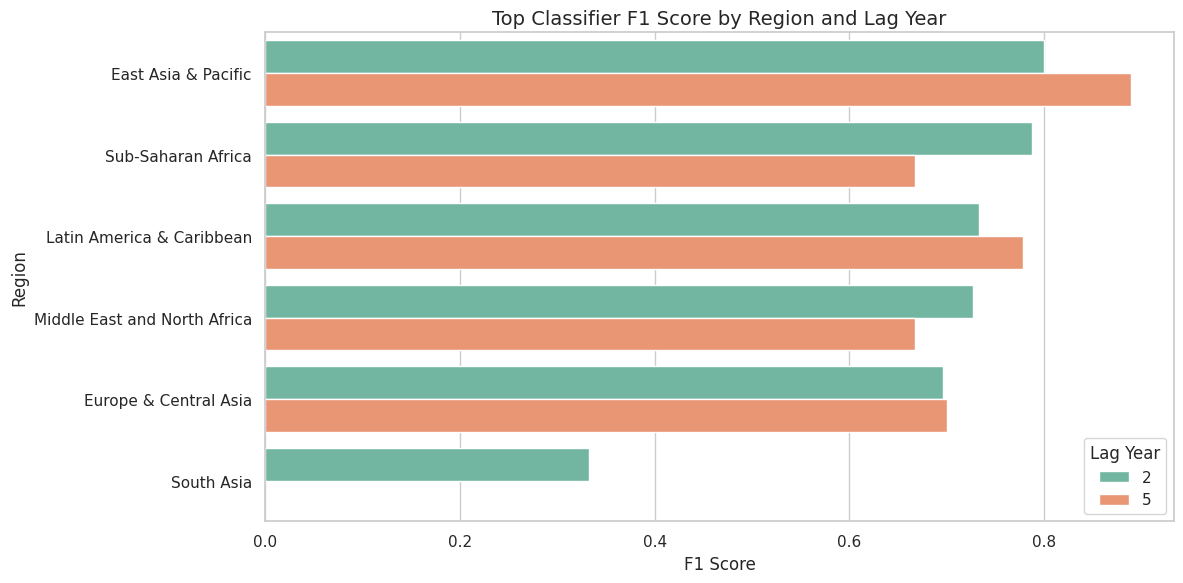

In [211]:
top_model_by_region = top_model_by_region.sort_values('F1 Score', ascending=False)
sns.set(style='whitegrid')
# barplot for F1 Score
plt.figure(figsize=(12, 6))
sns.barplot(x='F1 Score', y='Region', hue='Lag Year', data=top_model_by_region, palette='Set2')
plt.title('Top Classifier F1 Score by Region and Lag Year', fontsize=14)
plt.xlabel('F1 Score')
plt.ylabel('Region')
plt.legend(title='Lag Year')
plt.tight_layout()
plt.show()

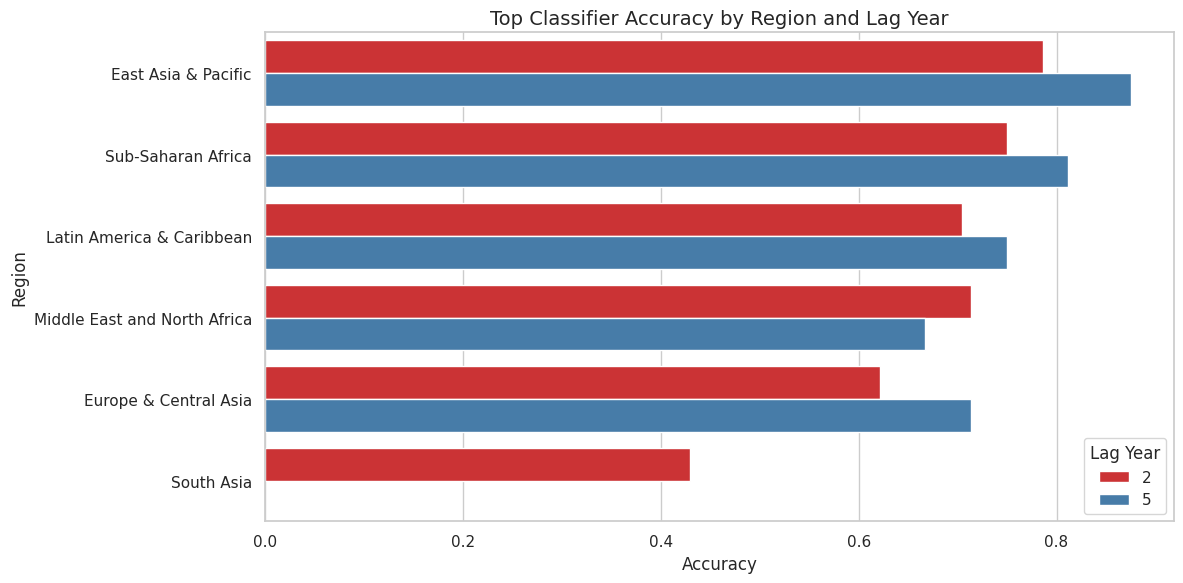

In [212]:
# barplot for Accuracy
plt.figure(figsize=(12, 6))
sns.barplot(x='Accuracy', y='Region', hue='Lag Year', data=top_model_by_region, palette='Set1')
plt.title('Top Classifier Accuracy by Region and Lag Year', fontsize=14)
plt.xlabel('Accuracy')
plt.ylabel('Region')
plt.legend(title='Lag Year')
plt.tight_layout()
plt.show()

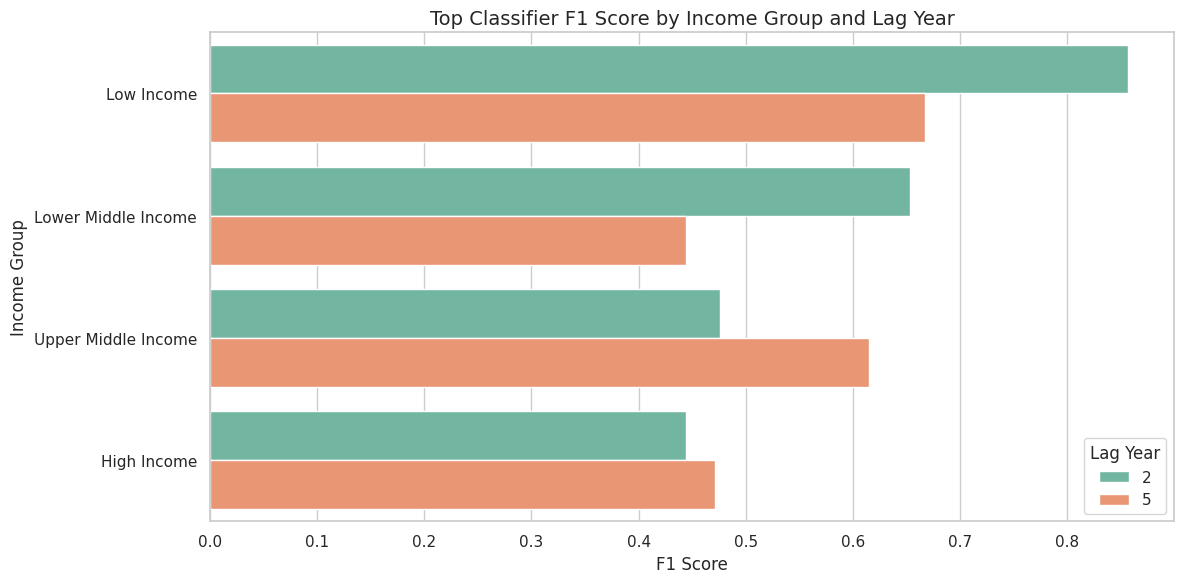

In [213]:
top_model_by_income = top_model_by_income.sort_values('F1 Score', ascending=False)
sns.set(style='whitegrid')

plt.figure(figsize=(12, 6))
sns.barplot(x='F1 Score', y='Income Group', hue='Lag Year', data=top_model_by_income, palette='Set2')
plt.title('Top Classifier F1 Score by Income Group and Lag Year', fontsize=14)
plt.xlabel('F1 Score')
plt.ylabel('Income Group')
plt.legend(title='Lag Year')
plt.tight_layout()
plt.show()

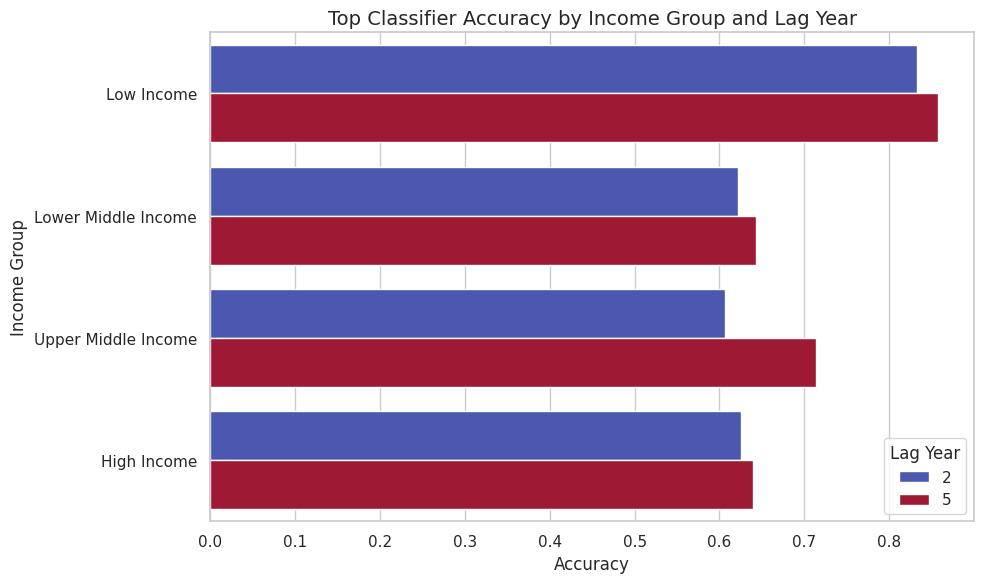

In [214]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Income Group', hue='Lag Year', data=top_model_by_income, palette='coolwarm')
plt.title('Top Classifier Accuracy by Income Group and Lag Year', fontsize=14)
plt.xlabel('Accuracy')
plt.ylabel('Income Group')
plt.legend(title='Lag Year')
plt.tight_layout()
plt.show()

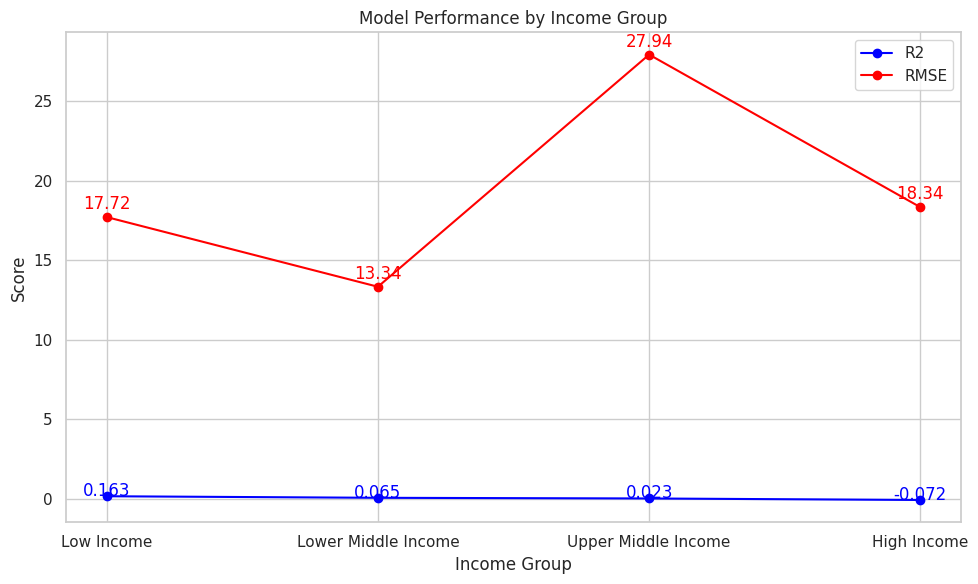

In [215]:
data_comparison = {
    'Income Group': ['Low Income', 'Lower Middle Income', 'Upper Middle Income', 'High Income'],
    'Best Model': ['XGBoost', 'CatBoost', 'Linear', 'CatBoost'],
    'R2': [0.163, 0.065, 0.023, -0.072],
    'RMSE': [17.720, 13.338, 27.938, 18.341]
}

df_income_compare = pd.DataFrame(data_comparison)

plt.figure(figsize=(10, 6))

plt.plot(df_income_compare['Income Group'], df_income_compare['R2'], marker='o', label='R2', color='blue')
for i, val in enumerate(df_income_compare['R2']):
  plt.text(i, val + 0.01, round(val, 3), ha='center', color='blue')

plt.plot(df_income_compare['Income Group'], df_income_compare['RMSE'], marker='o', label='RMSE', color='red')
for i, val in enumerate(df_income_compare['RMSE']):
  plt.text(i, val + 0.5, round(val, 2), ha='center', color='red')

plt.title('Model Performance by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

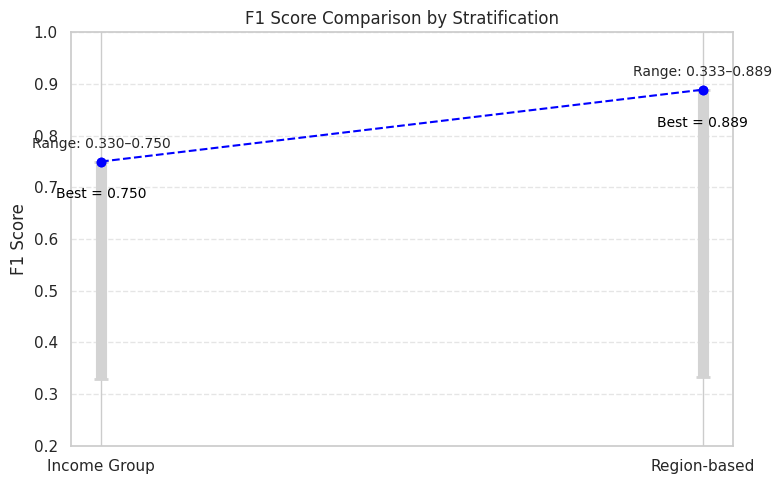

In [216]:
labels = ['Income Group', 'Region-based']
best_scores = [0.75, 0.889]
y_min = [0.33, 0.333]
y_max = [0.75, 0.889]

x = np.arange(len(labels))
width = 0.4
fig, ax = plt.subplots(figsize=(8, 5))
lower_err = np.array(best_scores) - np.array(y_min)
upper_err = np.array(y_max) - np.array(best_scores)
y_err = [lower_err, upper_err]

ax.errorbar(x, best_scores, yerr=y_err, fmt='o', color='blue',
             ecolor='lightgray', elinewidth=8, capsize=5, capthick=2)
ax.plot(x, best_scores, linestyle='--', color='blue', marker='o')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('F1 Score')
ax.set_title('F1 Score Comparison by Stratification')
ax.set_ylim(0.2, 1.0)
ax.grid(axis='y', linestyle='--', alpha=0.5)
for i, (b, mint, maxt) in enumerate(zip(best_scores, y_min, y_max)):
    ax.text(i, maxt + 0.02, f'Range: {mint:.3f}–{maxt:.3f}',
            ha='center', va='bottom', fontsize=10)
    ax.text(i, b - 0.05, f'Best = {b:.3f}',
            ha='center', va='top', fontsize=10, color='black')

plt.tight_layout()
plt.show()


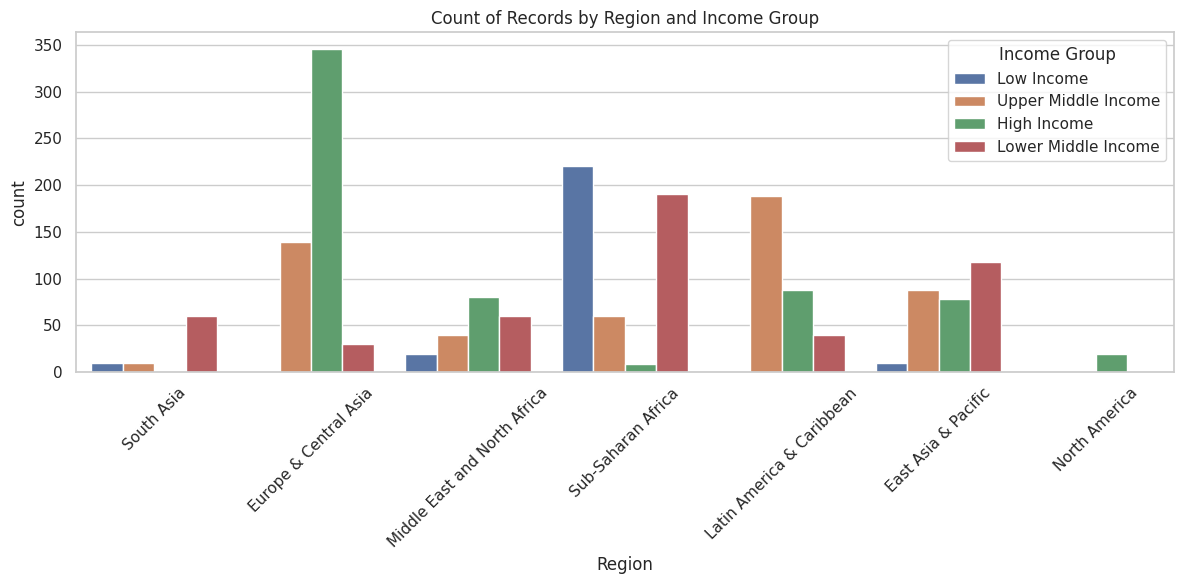

In [217]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_final_with_region, x='Region', hue='Income Group')
plt.title('Count of Records by Region and Income Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
